# 라이브러리 및 데이터 로드

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib
from glob import glob
import plotly.express as px

In [2]:
glob("data\*.csv")

['data\\5대범죄+발생장소별+현황_20221019093633.csv',
 'data\\5대범죄발생현황_20221019092810.csv',
 'data\\고위험+음주율_20221019142156.csv',
 'data\\도로+현황(폭원별)(1987년+이후)_20221020164851.csv',
 'data\\도로시설물_가로등개수_20221020164902.csv',
 'data\\범죄발생_시간_20221020174709.csv',
 'data\\서울시 유흥주점영업 인허가 정보.csv',
 'data\\서울시CCTV설치운영현황(자치구)_연도별_220630기준.csv',
 'data\\서울특별시_도봉구_보안등정보_20180515.csv']

In [3]:
glob("data\\5대범죄*.csv")

['data\\5대범죄+발생장소별+현황_20221019093633.csv', 'data\\5대범죄발생현황_20221019092810.csv']

In [4]:
df_5crime = pd.read_csv(glob("data\\5대범죄*.csv")[1])

In [5]:
df_drink = pd.read_csv('data\\고위험+음주율_20221019142156.csv')
df_drink.shape

(40, 24)

In [6]:
df_cctv = pd.read_csv('data\\서울시CCTV설치운영현황(자치구)_연도별_220630기준.csv', encoding="cp949")
df_cctv.shape

(26, 13)

In [7]:
df_sul = pd.read_csv('data\\서울시 유흥주점영업 인허가 정보.csv', encoding="cp949")
df_sul.shape

(4896, 44)

# 데이터 전처리

## 범죄 발생 데이터

In [8]:
df_5crime = df_5crime.drop(columns="자치구별(1)", index=0)

In [9]:
df_5 = df_5crime.drop(columns=["2014", "2015", "2016", "2017", "2018", "2019", "2020"], index=[1, 2, 3])

In [10]:
df_5m = df_5.melt(id_vars="자치구별(2)", var_name="연+분류", value_name="건수")

In [11]:
df_5m["연도"] = df_5m["연+분류"].apply(lambda x : int(x.split(".")[0]))
df_5m["분류코드"] = df_5m["연+분류"].apply(lambda x : int(x.split(".")[1]))

In [12]:
crime_code ="""1 합계-검거
2 살인-발생
3 살인-검거
4 강도-발생
5 강도-검거
6 강간,강제추행-발생
7 강간,강제추행-검거
8 절도-발생
9 절도-검거
10 폭력-발생
11 폭력-검거"""
crime_code

'1 합계-검거\n2 살인-발생\n3 살인-검거\n4 강도-발생\n5 강도-검거\n6 강간,강제추행-발생\n7 강간,강제추행-검거\n8 절도-발생\n9 절도-검거\n10 폭력-발생\n11 폭력-검거'

In [13]:
code_list = crime_code.split("\n")
code_list

['1 합계-검거',
 '2 살인-발생',
 '3 살인-검거',
 '4 강도-발생',
 '5 강도-검거',
 '6 강간,강제추행-발생',
 '7 강간,강제추행-검거',
 '8 절도-발생',
 '9 절도-검거',
 '10 폭력-발생',
 '11 폭력-검거']

In [14]:
code_dict = {int(n.split()[0]) : n.split()[1] for n in code_list}
code_dict

{1: '합계-검거',
 2: '살인-발생',
 3: '살인-검거',
 4: '강도-발생',
 5: '강도-검거',
 6: '강간,강제추행-발생',
 7: '강간,강제추행-검거',
 8: '절도-발생',
 9: '절도-검거',
 10: '폭력-발생',
 11: '폭력-검거'}

In [15]:
df_5m["분류"] = df_5m["분류코드"].map(code_dict)
df_5m["분류"]

0       합계-검거
1       합계-검거
2       합계-검거
3       합계-검거
4       합계-검거
        ...  
1920    폭력-검거
1921    폭력-검거
1922    폭력-검거
1923    폭력-검거
1924    폭력-검거
Name: 분류, Length: 1925, dtype: object

In [16]:
df_5m[df_5m["분류"] == "폭력-발생"]

,자치구별(2),연+분류,건수,연도,분류코드,분류
225,종로구,2014.10,2508,2014,10,폭력-발생
226,중구,2014.10,2415,2014,10,폭력-발생
227,용산구,2014.10,2018,2014,10,폭력-발생
228,성동구,2014.10,1682,2014,10,폭력-발생
229,광진구,2014.10,2828,2014,10,폭력-발생
...,...,...,...,...,...,...
1895,관악구,2020.10,2614,2020,10,폭력-발생
1896,서초구,2020.10,2173,2020,10,폭력-발생
1897,강남구,2020.10,3677,2020,10,폭력-발생
1898,송파구,2020.10,2675,2020,10,폭력-발생


In [17]:
df_5m["범죄종류"] = df_5m["분류"].apply(lambda x : x.split("-")[0])
df_5m["발생/검거"] = df_5m["분류"].apply(lambda x : x.split("-")[1])

In [18]:
df_5m = df_5m.drop(columns=["연+분류", "분류코드", "분류"])

In [19]:
df_5m = df_5m.rename(columns={"자치구별(2)" : "자치구별"})

In [20]:
df_all = df_5m[df_5m["범죄종류"] == "합계"]
df_all.head(2)

,자치구별,건수,연도,범죄종류,발생/검거
0,종로구,4610,2014,합계,검거
1,중구,3188,2014,합계,검거


In [21]:
df_5m[df_5m["건수"] == "-"]

,자치구별,건수,연도,범죄종류,발생/검거
876,중구,-,2017,살인,검거
1684,도봉구,-,2020,살인,발생
1709,도봉구,-,2020,살인,검거


In [22]:
df_5m.loc[[876, 1684, 1709], ['건수']] = 0

In [23]:
df_5m["건수"] = df_5m["건수"].astype(int)

In [24]:
df_5m["범죄종류"].value_counts()

살인         350
강도         350
강간,강제추행    350
절도         350
폭력         350
합계         175
Name: 범죄종류, dtype: int64

## 고위험 음주율

In [25]:
df_drink1 = df_drink.drop(columns=["구분별(1)", "구분별(2)", "2014", "2015", "2016", "2017", "2018", "2019", "2020"], index=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])

In [26]:
df_drink_all = df_drink.drop(columns=["구분별(1)", "구분별(2)"], index=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])
df_drink_all = df_drink_all[["구분별(3)", "2014", "2015", "2016", "2017", "2018", "2019", "2020"]]
df_drink_all.head(2)

,구분별(3),2014,2015,2016,2017,2018,2019,2020
15,종로구,12.9,13.9,14.6,13.8,11.1,15.2,6.7
16,중구,12.7,14.1,15.2,11.1,13.9,12.1,5.4


In [27]:
df_drink_all = df_drink_all.rename(columns={"구분별(3)" : "자치구별"})
df_drink_all.head(2)

,자치구별,2014,2015,2016,2017,2018,2019,2020
15,종로구,12.9,13.9,14.6,13.8,11.1,15.2,6.7
16,중구,12.7,14.1,15.2,11.1,13.9,12.1,5.4


In [28]:
df_drink_all = df_drink_all.reset_index(drop=True)
df_drink_all.head(2)

,자치구별,2014,2015,2016,2017,2018,2019,2020
0,종로구,12.9,13.9,14.6,13.8,11.1,15.2,6.7
1,중구,12.7,14.1,15.2,11.1,13.9,12.1,5.4


In [29]:
df_drink_m = df_drink_all.melt(id_vars="자치구별", var_name="연도", value_name="음주율")
df_drink_m.head(2)

,자치구별,연도,음주율
0,종로구,2014,12.9
1,중구,2014,12.7


In [30]:
df_drink_m["연도"] = df_drink_m["연도"].astype(int)

In [31]:
df_drink_m["음주율"] = df_drink_m["음주율"].astype(float)

In [32]:
drink_mean = df_drink_m.groupby("자치구별")["음주율"].mean().sort_values(ascending=False)
drink_mean

자치구별
동대문구    15.785714
중랑구     15.085714
금천구     14.642857
강북구     14.385714
성동구     13.742857
성북구     13.600000
도봉구     13.414286
은평구     13.100000
영등포구    13.028571
노원구     12.628571
종로구     12.600000
서대문구    12.528571
용산구     12.514286
양천구     12.285714
관악구     12.242857
광진구     12.228571
중구      12.071429
구로구     12.057143
마포구     11.957143
강동구     11.657143
동작구     11.571429
강서구     11.457143
송파구     11.014286
강남구     10.557143
서초구      9.685714
Name: 음주율, dtype: float64

## 범죄 종류별로 분류

In [33]:
df_mur = df_5m[df_5m["범죄종류"]=="살인"]

In [34]:
df_rob = df_5m[df_5m["범죄종류"]=="강도"]

In [35]:
df_st = df_5m[df_5m["범죄종류"]=="절도"]

In [36]:
df_ra = df_5m[df_5m["범죄종류"]=="강간,강제추행"]

In [37]:
df_hit = df_5m[df_5m["범죄종류"]=="폭력"]

### 발생/검거 별로 분류

In [38]:
hit_mean = round(df_hit[df_hit["발생/검거"]=="발생"].groupby(by=["자치구별"])["건수"].mean(), 2)
hit_sol = round(df_hit[df_hit["발생/검거"]=="검거"].groupby(by=["자치구별"])["건수"].mean(), 2)

In [39]:
mur_mean = round(df_mur[df_mur["발생/검거"]=="발생"].groupby(by=["자치구별"])["건수"].mean(), 2)
mur_sol = round(df_mur[df_mur["발생/검거"]=="검거"].groupby(by=["자치구별"])["건수"].mean(), 2)

In [40]:
rob_mean = round(df_rob[df_rob["발생/검거"]=="발생"].groupby(by=["자치구별"])["건수"].mean(), 2)
rob_sol = round(df_rob[df_rob["발생/검거"]=="검거"].groupby(by=["자치구별"])["건수"].mean(), 2)

In [41]:
steal_mean = round(df_st[df_st["발생/검거"]=="발생"].groupby(by=["자치구별"])["건수"].mean(), 2)
steal_sol = round(df_st[df_st["발생/검거"]=="검거"].groupby(by=["자치구별"])["건수"].mean(), 2)

In [42]:
ra_mean = round(df_ra[df_ra["발생/검거"]=="발생"].groupby(by=["자치구별"])["건수"].mean(), 2)
ra_sol = round(df_ra[df_ra["발생/검거"]=="검거"].groupby(by=["자치구별"])["건수"].mean(), 2)

## CCTV 데이터

In [43]:
df_cctv.head(2)

,구분,총계,2013년 이전\n설치된 CCTV,2013년,2014년,2015년,2016년,2017년,2018년,2019년,2020년,2021년,2022년
0,계,"85,242","5,001","3,758","4,011","6,659","8,812","11,569","10,880","12,541","11,561","8,614","1,836"
1,종로구,"1,855",21,537,120,161,134,165,166,69,254,76,152


In [44]:
df_cctv.columns

Index(['구분', '총계', '2013년 이전\n설치된 CCTV', '2013년', '2014년', '2015년', '2016년',
       '2017년', '2018년', '2019년', '2020년', '2021년', '2022년'],
      dtype='object')

In [45]:
cctv_all = df_cctv.drop(columns=['2013년 이전\n설치된 CCTV', '2013년', '2014년', '2015년', '2016년',
       '2017년', '2018년', '2019년', '2020년', '2021년', '2022년'], index=[0])
cctv_all = cctv_all.reset_index(drop=True)
cctv_all.head(2)

,구분,총계
0,종로구,"1,855"
1,중 구,"2,447"


In [46]:
df_cctv_d = df_cctv.drop(columns=["2013년 이전\n설치된 CCTV", "총계", "2013년", "2021년", "2022년"], index=[0])

In [47]:
df_cctv_d.head(2)

,구분,2014년,2015년,2016년,2017년,2018년,2019년,2020년
1,종로구,120,161,134,165,166,69,254
2,중 구,77,236,240,372,386,155,361


In [48]:
df_cctv_m = df_cctv_d.melt(id_vars="구분", var_name="연도", value_name="갯수")
df_cctv_m

,구분,연도,갯수
0,종로구,2014년,120
1,중 구,2014년,77
2,용산구,2014년,125
3,성동구,2014년,111
4,광진구,2014년,177
...,...,...,...
170,관악구,2020년,404
171,서초구,2020년,433
172,강남구,2020년,926
173,송파구,2020년,235


In [49]:
df_cctv_m = df_cctv_m.rename(columns={"구분" : "자치구별"})

In [50]:
df_cctv_m["연도"]

0      2014년
1      2014년
2      2014년
3      2014년
4      2014년
       ...  
170    2020년
171    2020년
172    2020년
173    2020년
174    2020년
Name: 연도, Length: 175, dtype: object

In [51]:
df_cctv_m["연도"] = df_cctv_m["연도"].apply(lambda x : int(x[:4]))

In [52]:
df_cctv_m["연도"]

0      2014
1      2014
2      2014
3      2014
4      2014
       ... 
170    2020
171    2020
172    2020
173    2020
174    2020
Name: 연도, Length: 175, dtype: int64

In [53]:
cctv_year = df_cctv_m.pivot_table(index="연도", columns="자치구별", values="갯수")
cctv_year

자치구별,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,...,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중 구,중랑구
연도,,,,,,,,,,,,,,,,,,,,,
2014,580.0,49.0,17.0,202.0,304.0,177.0,187.0,70.0,77.0,81.0,...,111.0,229.0,84.0,134.0,123.0,125.0,332.0,120.0,77.0,88.0
2015,830.0,154.0,89.0,194.0,557.0,95.0,268.0,361.0,514.0,73.0,...,327.0,322.0,214.0,246.0,209.0,221.0,329.0,161.0,236.0,149.0
2016,1293.0,202.0,218.0,168.0,616.0,40.0,326.0,133.0,331.0,106.0,...,255.0,594.0,143.0,424.0,248.0,298.0,555.0,134.0,240.0,178.0
2017,988.0,273.0,5.0,506.0,681.0,666.0,540.0,196.0,175.0,126.0,...,973.0,811.0,241.0,577.0,311.0,351.0,403.0,165.0,372.0,174.0
2018,745.0,377.0,379.0,259.0,674.0,460.0,488.0,539.0,216.0,209.0,...,415.0,867.0,541.0,837.0,658.0,125.0,635.0,166.0,386.0,215.0
2019,791.0,356.0,980.0,458.0,890.0,712.0,434.0,367.0,320.0,205.0,...,491.0,714.0,1073.0,312.0,65.0,307.0,1057.0,69.0,155.0,1059.0
2020,926.0,614.0,573.0,359.0,404.0,190.0,415.0,513.0,387.0,183.0,...,472.0,253.0,235.0,346.0,1213.0,617.0,288.0,254.0,361.0,976.0


## 유흥주점 개수

In [54]:
df_sul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4896 entries, 0 to 4895
Data columns (total 44 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   개방자치단체코드   4896 non-null   int64  
 1   관리번호       4896 non-null   object 
 2   인허가일자      4896 non-null   int64  
 3   인허가취소일자    0 non-null      float64
 4   영업상태코드     4896 non-null   int64  
 5   영업상태명      4896 non-null   object 
 6   상세영업상태코드   4896 non-null   int64  
 7   상세영업상태명    4896 non-null   object 
 8   폐업일자       3092 non-null   float64
 9   휴업시작일자     0 non-null      float64
 10  휴업종료일자     0 non-null      float64
 11  재개업일자      0 non-null      float64
 12  전화번호       3884 non-null   object 
 13  소재지면적      4535 non-null   float64
 14  소재지우편번호    4894 non-null   float64
 15  지번주소       4894 non-null   object 
 16  도로명주소      2799 non-null   object 
 17  도로명우편번호    2692 non-null   float64
 18  사업장명       4896 non-null   object 
 19  최종수정일자     4896 non-null   int64  
 20  데이터갱신구분 

In [55]:
df_sul.head(2)

,개방자치단체코드,관리번호,인허가일자,인허가취소일자,영업상태코드,영업상태명,상세영업상태코드,상세영업상태명,폐업일자,휴업시작일자,...,공장판매직종업원수,공장생산직종업원수,건물소유구분명,보증액,월세액,다중이용업소여부,시설총규모,전통업소지정번호,전통업소주된음식,홈페이지
0,3130000,3130000-102-2002-00004,20021029,NaN,3,폐업,2,폐업,20130620.0,NaN,...,NaN,NaN,NaN,NaN,NaN,N,82.40,NaN,NaN,NaN
1,3230000,3230000-102-2014-00001,20140321,NaN,1,영업/정상,1,영업,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,N,79.47,NaN,NaN,NaN


In [73]:
df_sul["영업상태명"].value_counts()

폐업       3092
영업/정상    1804
Name: 영업상태명, dtype: int64

In [74]:
df_bar = df_sul[df_sul["영업상태명"] == "영업/정상"]

In [75]:
df_bar["지번주소"].isnull().sum()

2

In [76]:
df_baraddress = df_bar["지번주소"].dropna()

In [78]:
df_baraddress.isnull().sum()

0

In [84]:
df_baraddress.reset_index()

,index,지번주소
0,1,서울특별시 송파구 방이동 34-4번지
1,7,서울특별시 은평구 갈현동 395-28
2,8,서울특별시 도봉구 창동 12-1 2층 201202203204호
3,9,서울특별시 강북구 수유동 191-15
4,10,서울특별시 강동구 길동 387-7
...,...,...
1797,4888,서울특별시 금천구 시흥동 954-32 지하1층
1798,4889,서울특별시 금천구 독산동 293-5
1799,4890,서울특별시 영등포구 영등포동3가 17-9 스카이모텔
1800,4891,서울특별시 서초구 잠원동 21-3 4호 (지하 1층)


In [86]:
df_baraddress.apply(lambda x : x.split(" ")[1])

1        송파구
7        은평구
8        도봉구
9        강북구
10       강동구
        ... 
4888     금천구
4889     금천구
4890    영등포구
4891     서초구
4892    영등포구
Name: 지번주소, Length: 1802, dtype: object

In [88]:
df_baraddress

1        송파구
7        은평구
8        도봉구
9        강북구
10       강동구
        ... 
4888     금천구
4889     금천구
4890    영등포구
4891     서초구
4892    영등포구
Name: 지번주소, Length: 1802, dtype: object

In [89]:
df_baraddress.value_counts()

중구      214
관악구     190
종로구     188
강남구     178
영등포구    130
강서구     126
강동구     109
송파구      88
은평구      79
강북구      67
동대문구     62
마포구      48
동작구      46
금천구      44
서초구      44
구로구      31
서대문구     28
용산구      23
성동구      22
도봉구      21
노원구      21
중랑구      17
광진구      14
성북구       8
양천구       4
Name: 지번주소, dtype: int64

In [145]:
df_bar_gu = df_baraddress.value_counts()
df_bar_gu

중구      214
관악구     190
종로구     188
강남구     178
영등포구    130
강서구     126
강동구     109
송파구      88
은평구      79
강북구      67
동대문구     62
마포구      48
동작구      46
금천구      44
서초구      44
구로구      31
서대문구     28
용산구      23
성동구      22
도봉구      21
노원구      21
중랑구      17
광진구      14
성북구       8
양천구       4
Name: 지번주소, dtype: int64

# 시각화

## 범죄 데이터 시각화

### 폭력

<AxesSubplot:xlabel='자치구별', ylabel='건수'>

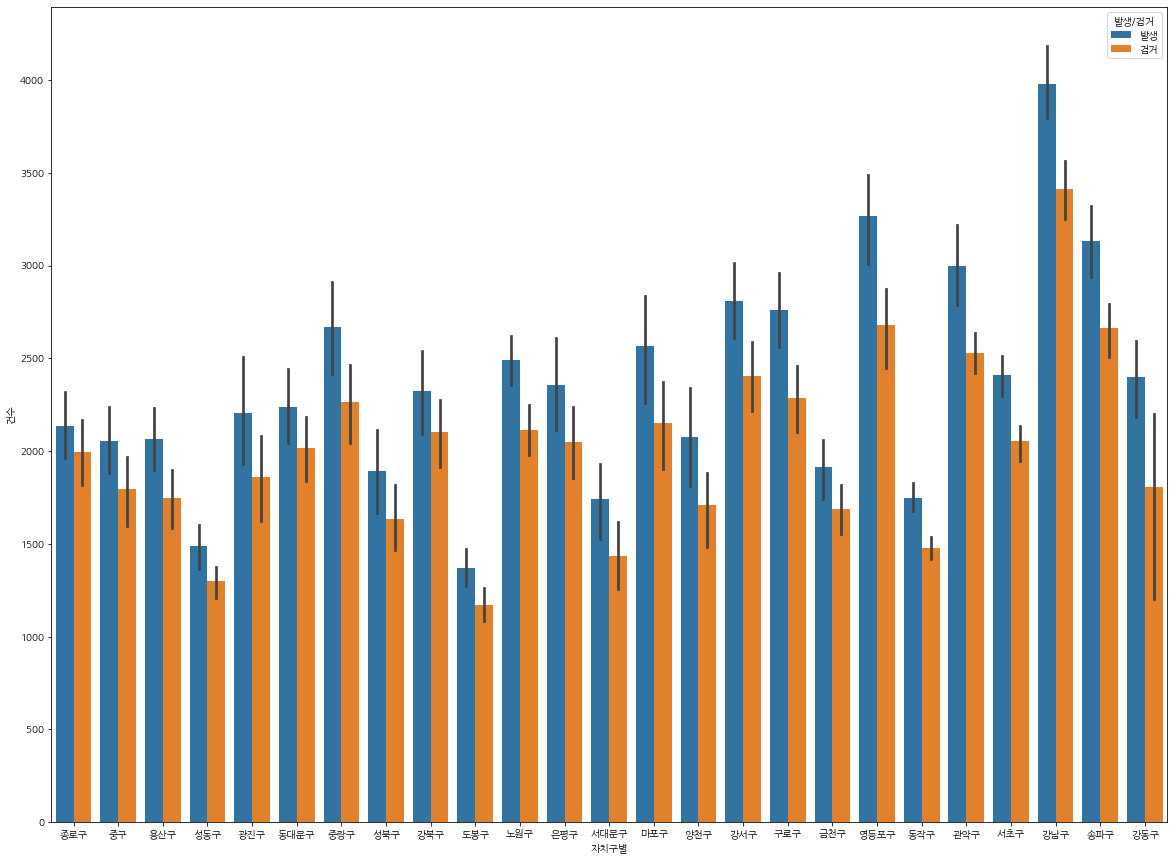

In [91]:
plt.figure(figsize=(20,15))
sns.barplot(data=df_hit, x="자치구별", y = "건수", hue = "발생/검거")

<AxesSubplot:title={'center':'구별 평균 폭력 범죄 발생 건수'}, xlabel='자치구별'>

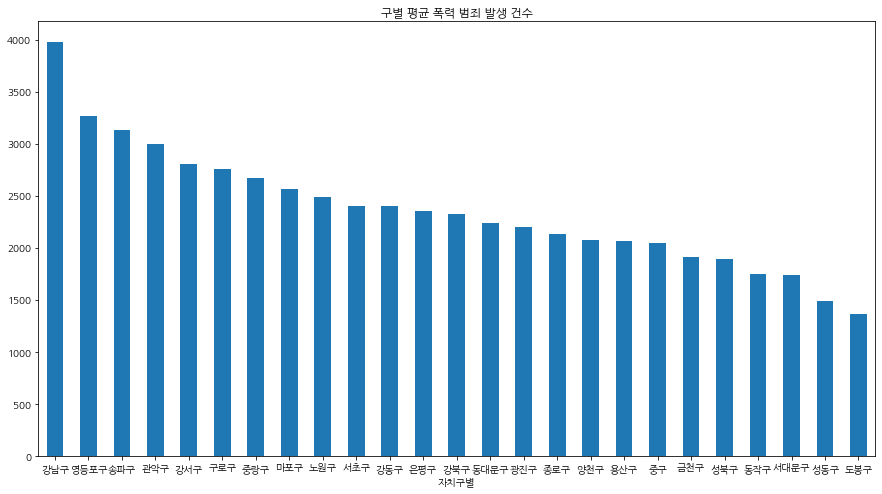

In [92]:
df_hit[df_hit["발생/검거"]=="발생"].groupby(by=["자치구별"])["건수"].mean().sort_values(ascending=False).plot(
    kind="bar", rot=0, title="구별 평균 폭력 범죄 발생 건수", figsize=(15, 8) )

In [93]:
hit_year = df_hit[df_hit["발생/검거"]=="발생"].pivot_table(index="연도", columns="자치구별", values="건수")
hit_year

자치구별,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,...,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
연도,,,,,,,,,,,,,,,,,,,,,
2014,4394,2804,2320,2717,3359,2828,2743,2112,2722,1585,...,1682,2287,3532,2439,3649,2018,2862,2508,2415,2775
2015,4284,2712,2649,3207,3298,2625,3007,2054,2723,1487,...,1612,2209,3295,2509,3572,2050,2653,2293,2224,2847
2016,4002,2530,2778,3204,3235,2392,3164,2193,2516,1441,...,1619,2108,3289,2250,3593,2384,2664,2263,2225,3164
2017,3956,2429,2156,2916,3152,2146,2827,1874,2478,1258,...,1559,1902,3007,2148,3190,2381,2256,2143,2061,2858
2018,3885,2224,2122,2619,2643,1908,2826,1912,2381,1349,...,1325,1687,3135,2005,3132,1980,2115,1962,1955,2581
2019,3658,2163,2424,2557,2674,1853,2552,1779,2464,1224,...,1394,1613,2992,1602,3042,2036,2117,2082,1922,2450
2020,3677,1942,1817,2445,2614,1676,2204,1471,2163,1234,...,1223,1430,2675,1582,2701,1617,1840,1711,1576,2022


<AxesSubplot:xlabel='자치구별', ylabel='연도'>

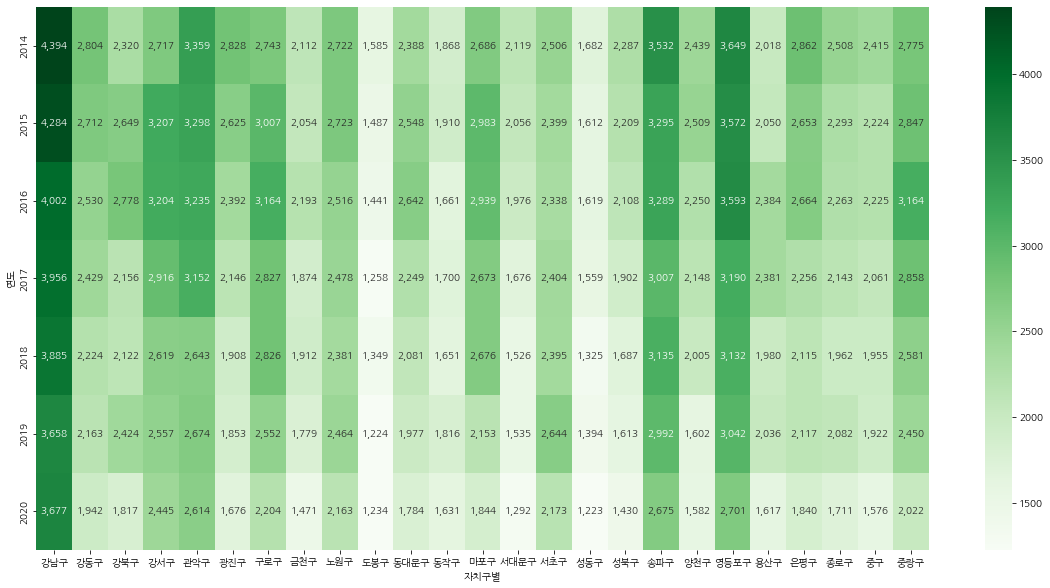

In [94]:
plt.figure(figsize=(20, 10))
sns.heatmap(hit_year, annot=True, fmt=",.0f", cmap="Greens")

### 살인

<AxesSubplot:xlabel='자치구별', ylabel='건수'>

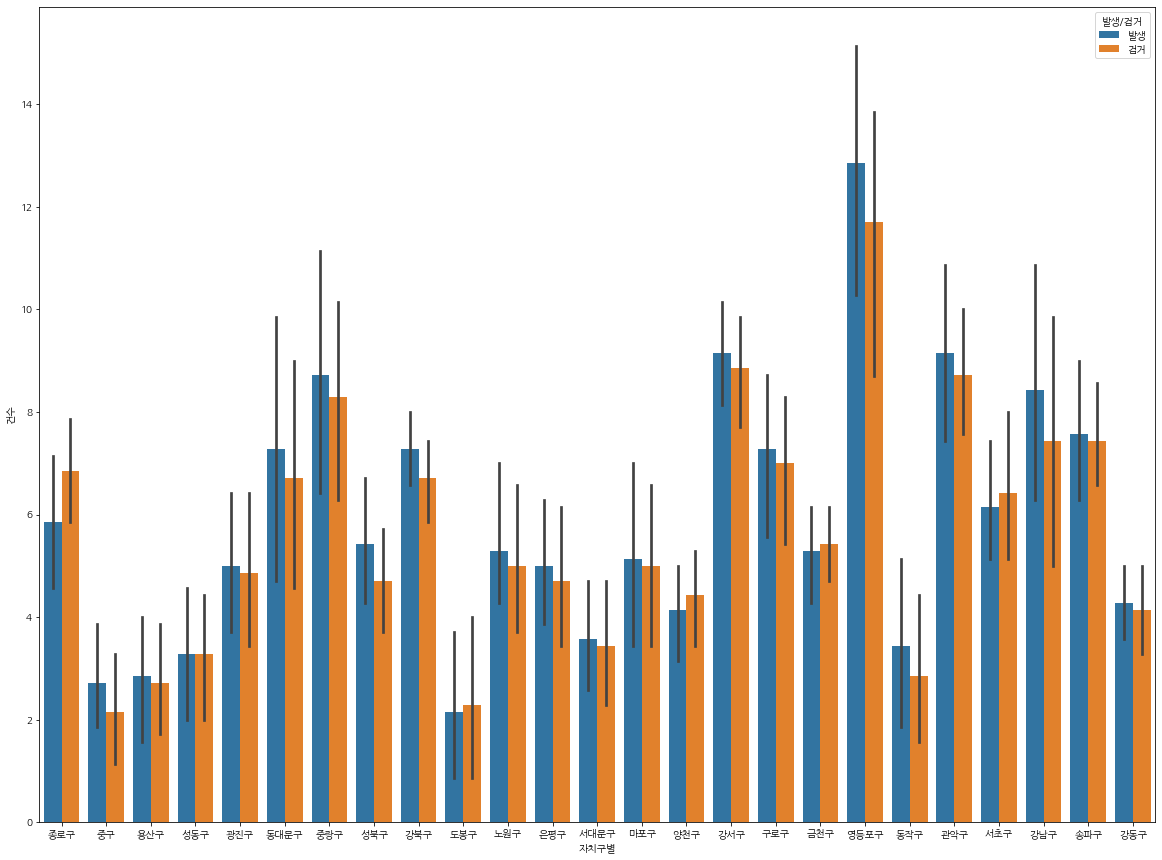

In [95]:
plt.figure(figsize=(20,15))
sns.barplot(data=df_mur, x="자치구별", y = "건수", hue = "발생/검거")

<AxesSubplot:title={'center':'구별 평균 살인 범죄 발생 건수'}, xlabel='자치구별'>

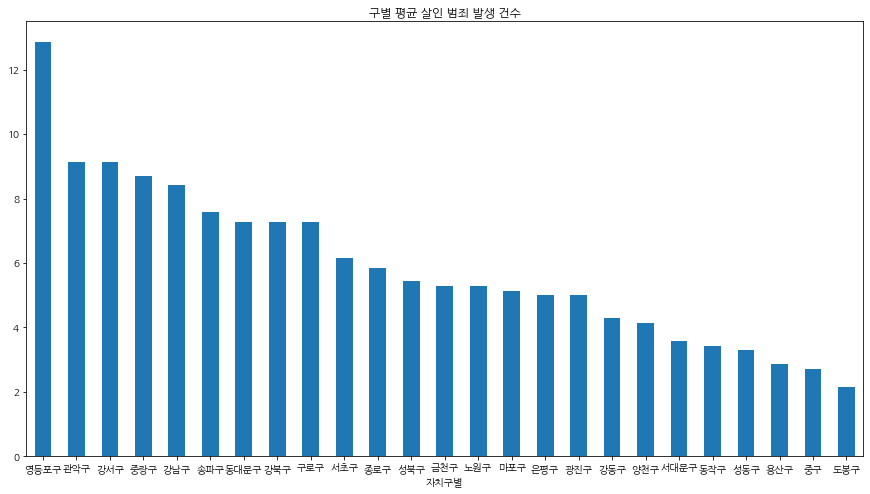

In [96]:
df_mur[df_mur["발생/검거"]=="발생"].groupby(by=["자치구별"])["건수"].mean().sort_values(ascending=False).plot(
    kind="bar", rot=0, title="구별 평균 살인 범죄 발생 건수", figsize=(15, 8) )

<AxesSubplot:xlabel='자치구별', ylabel='연도'>

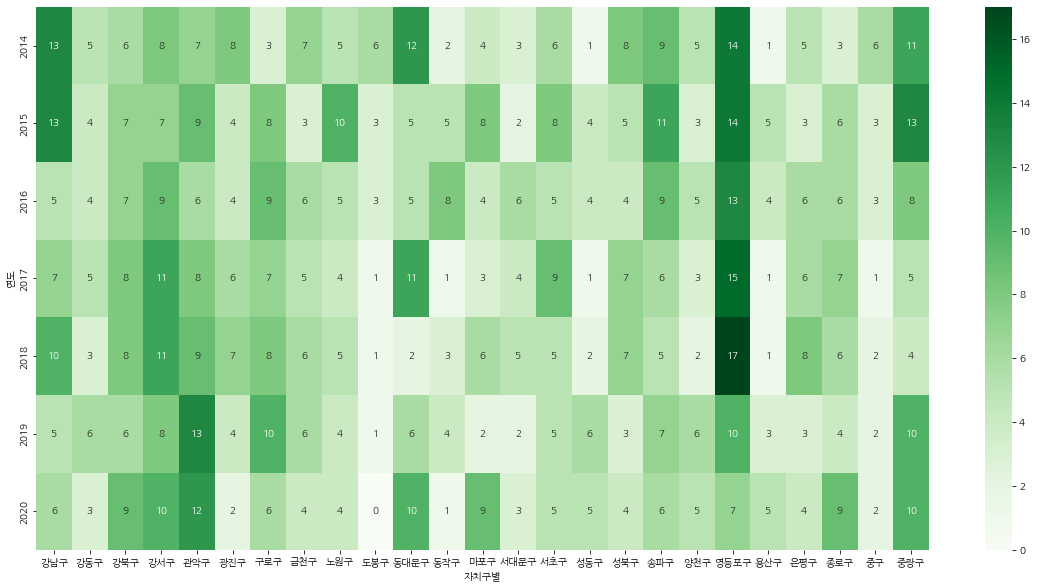

In [97]:
mur_year = df_mur[df_mur["발생/검거"]=="발생"].pivot_table(index="연도", columns="자치구별", values="건수")
plt.figure(figsize=(20, 10))
sns.heatmap(mur_year, annot=True, fmt=",.0f", cmap="Greens")

### 절도

<AxesSubplot:xlabel='자치구별', ylabel='건수'>

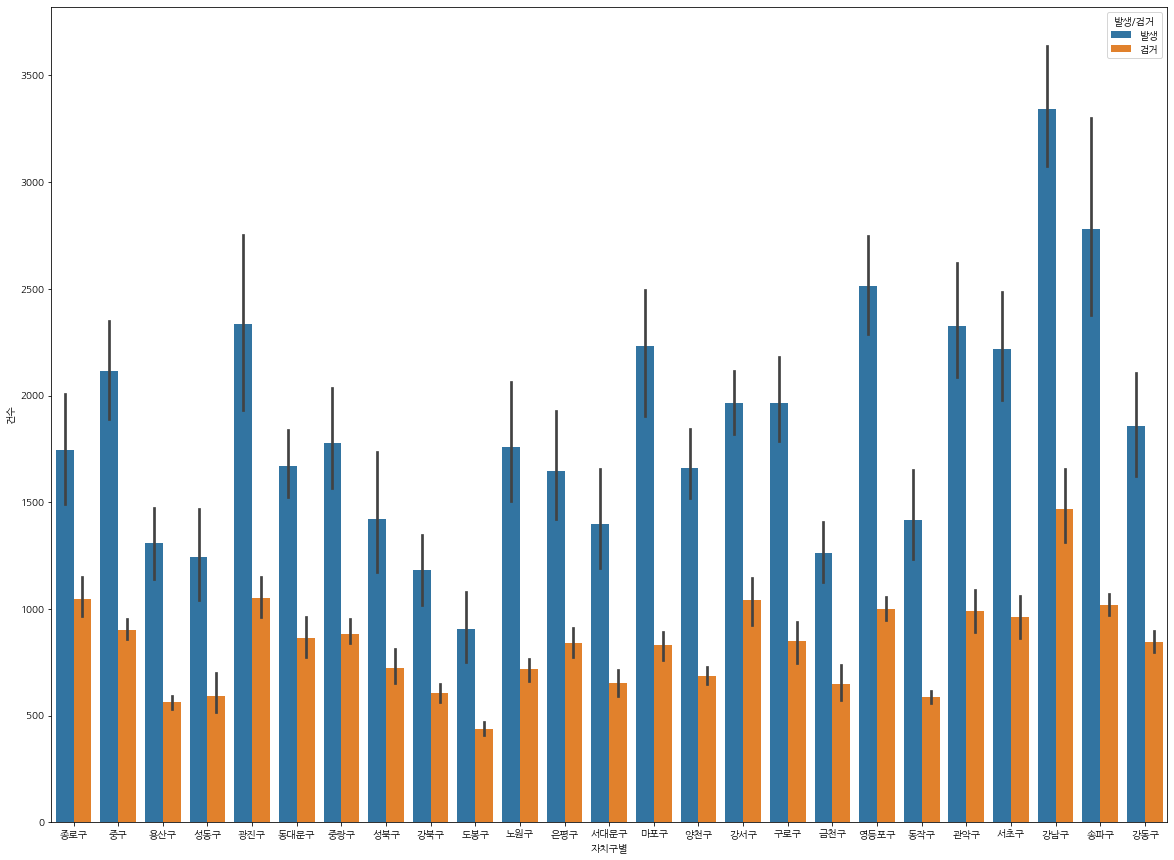

In [98]:
plt.figure(figsize=(20,15))
sns.barplot(data=df_st, x="자치구별", y = "건수", hue = "발생/검거")

<AxesSubplot:title={'center':'구별 평균 절도 범죄 발생 건수'}, xlabel='자치구별'>

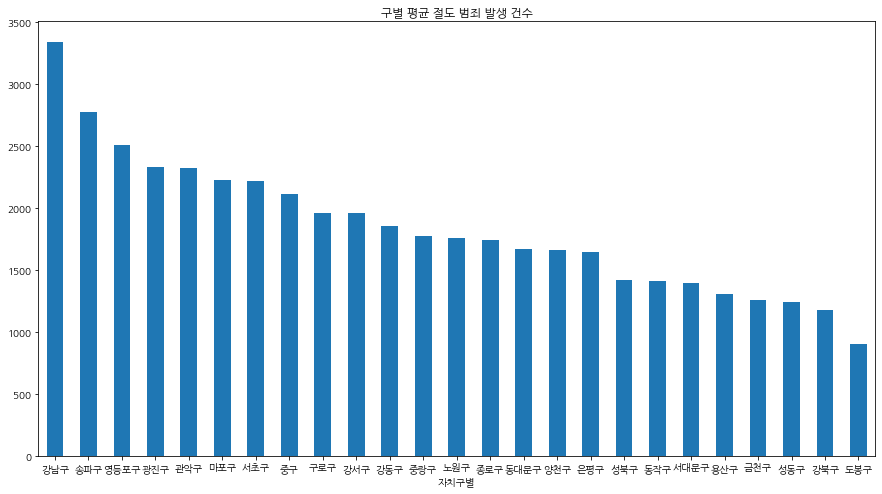

In [99]:
df_st[df_st["발생/검거"]=="발생"].groupby(by=["자치구별"])["건수"].mean().sort_values(ascending=False).plot(
    kind="bar", rot=0, title="구별 평균 절도 범죄 발생 건수", figsize=(15, 8) )

<AxesSubplot:xlabel='자치구별', ylabel='연도'>

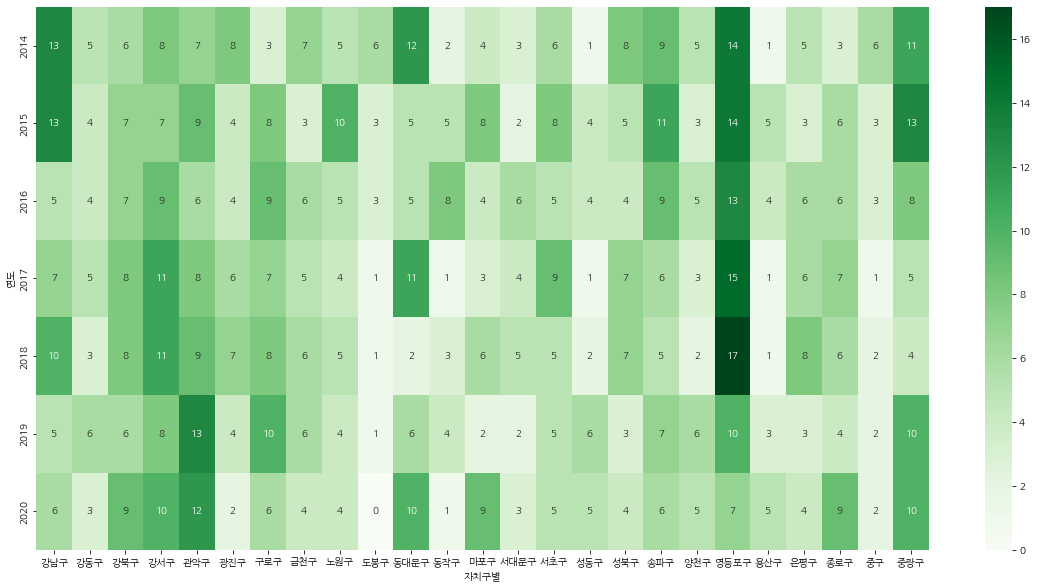

In [100]:
st_year = df_st[df_st["발생/검거"]=="발생"].pivot_table(index="연도", columns="자치구별", values="건수")
plt.figure(figsize=(20, 10))
sns.heatmap(mur_year, annot=True, fmt=",.0f", cmap="Greens")

### 강도

<AxesSubplot:xlabel='자치구별', ylabel='건수'>

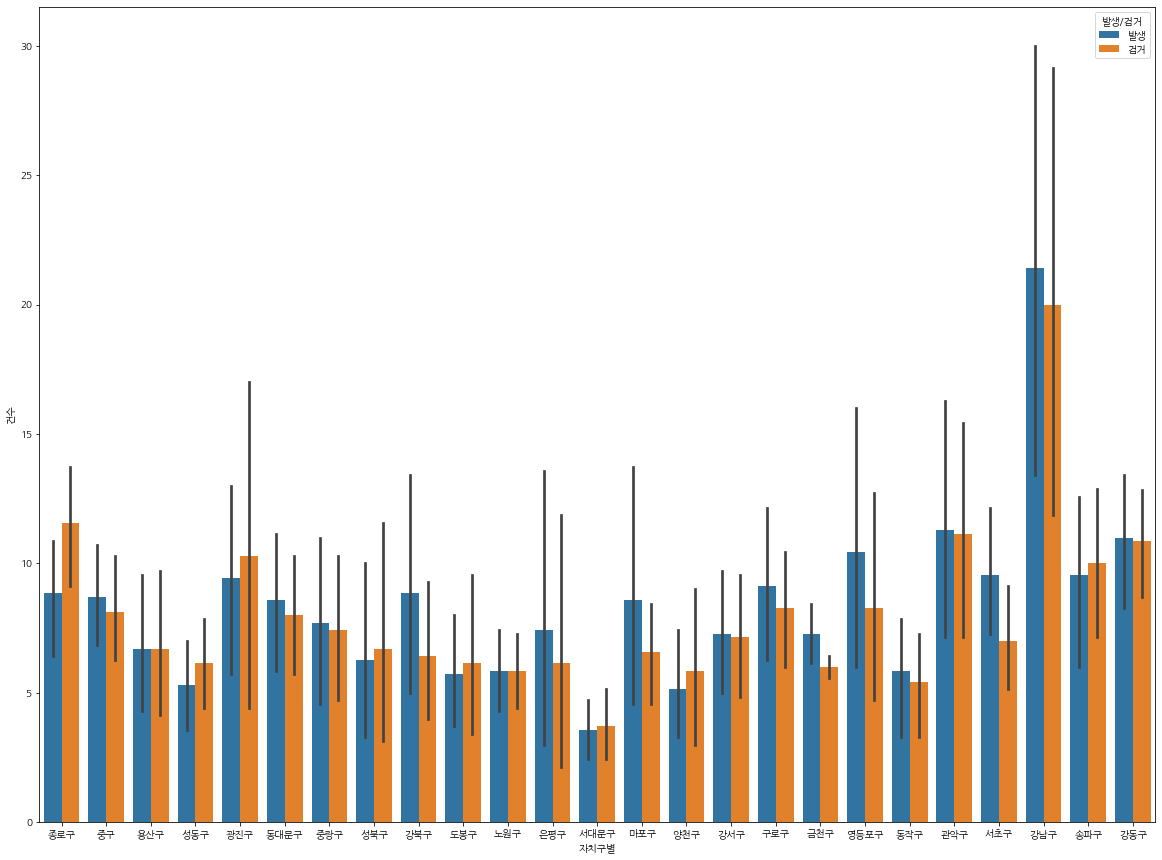

In [101]:
plt.figure(figsize=(20,15))
sns.barplot(data=df_rob, x="자치구별", y = "건수", hue = "발생/검거")

<AxesSubplot:title={'center':'구별 평균 강도 범죄 발생 건수'}, xlabel='자치구별'>

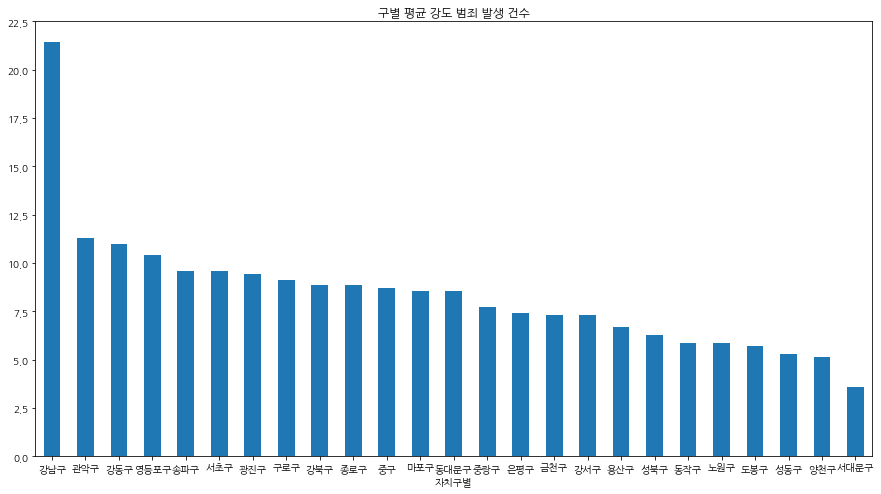

In [102]:
df_rob[df_rob["발생/검거"]=="발생"].groupby(by=["자치구별"])["건수"].mean().sort_values(ascending=False).plot(
    kind="bar", rot=0, title="구별 평균 강도 범죄 발생 건수", figsize=(15, 8) )

<AxesSubplot:xlabel='자치구별', ylabel='연도'>

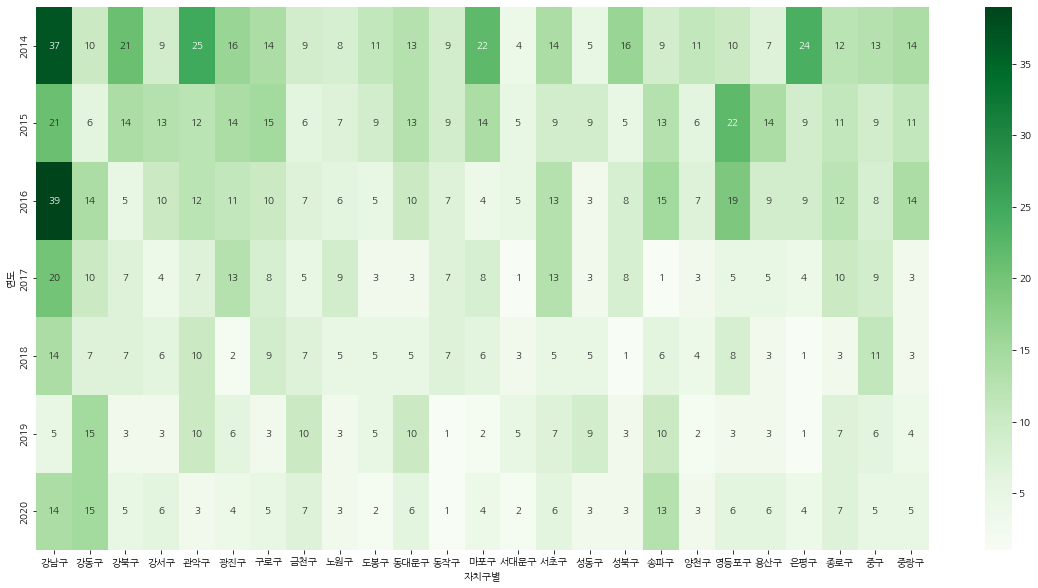

In [103]:
rob_year = df_rob[df_rob["발생/검거"]=="발생"].pivot_table(index="연도", columns="자치구별", values="건수")
plt.figure(figsize=(20, 10))
sns.heatmap(rob_year, annot=True, fmt=",.0f", cmap="Greens")

### 강간, 강제 추행

<AxesSubplot:xlabel='자치구별', ylabel='건수'>

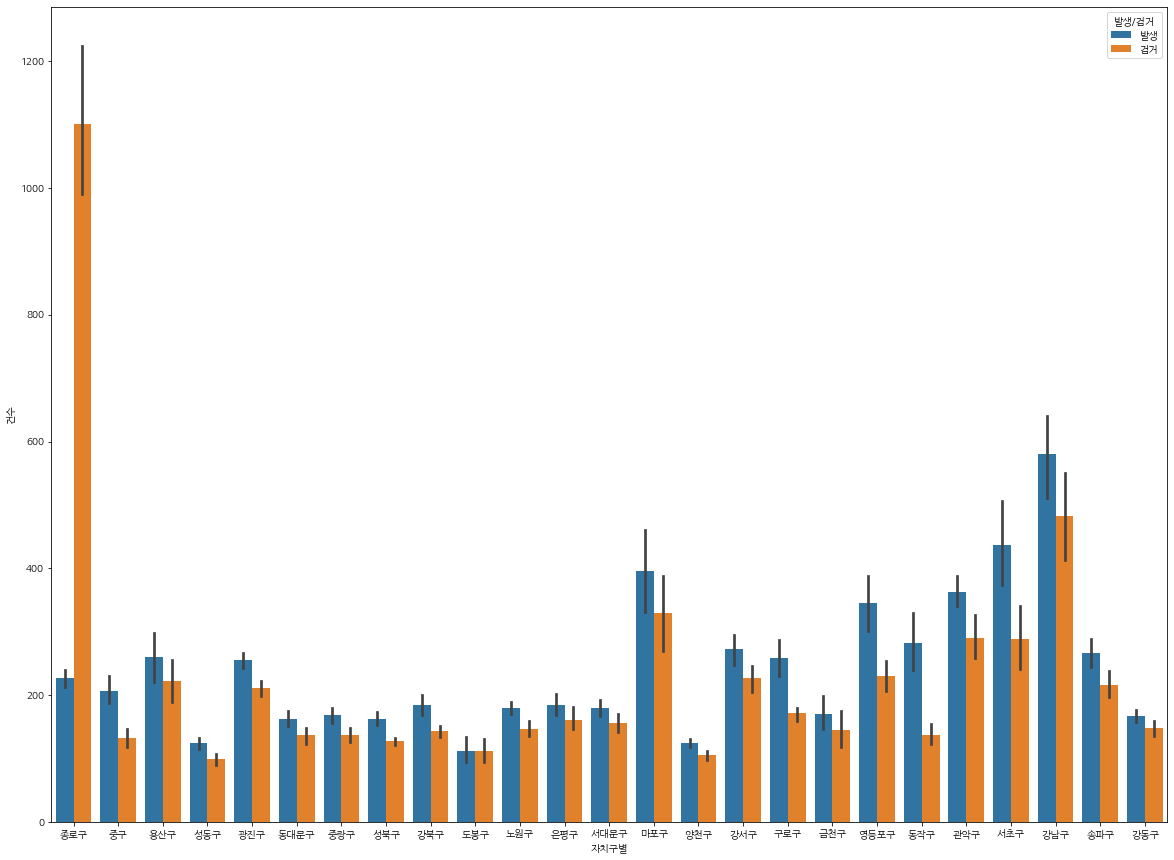

In [104]:
plt.figure(figsize=(20,15))
sns.barplot(data=df_ra, x="자치구별", y = "건수", hue = "발생/검거")

<AxesSubplot:title={'center':'구별 평균 강간/강제 추행 범죄 발생 건수'}, xlabel='자치구별'>

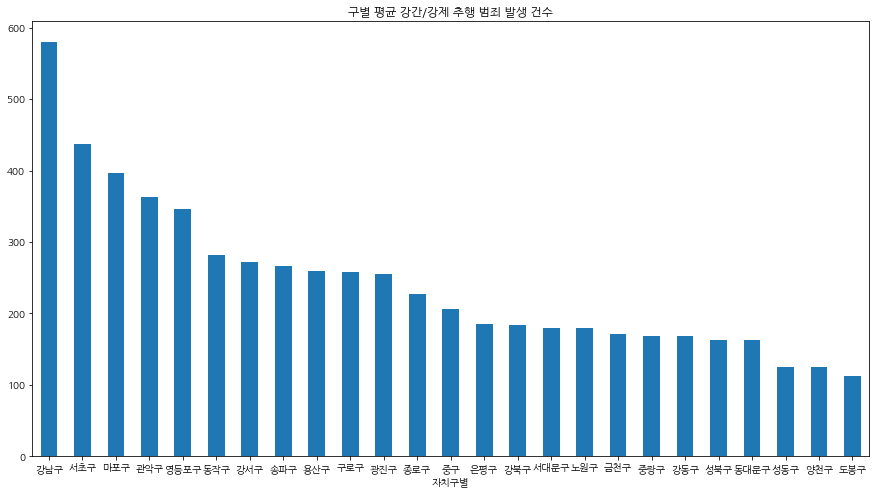

In [105]:
df_ra[df_ra["발생/검거"]=="발생"].groupby(by=["자치구별"])["건수"].mean().sort_values(ascending=False).plot(
    kind="bar", rot=0, title="구별 평균 강간/강제 추행 범죄 발생 건수", figsize=(15, 8) )

<AxesSubplot:xlabel='자치구별', ylabel='연도'>

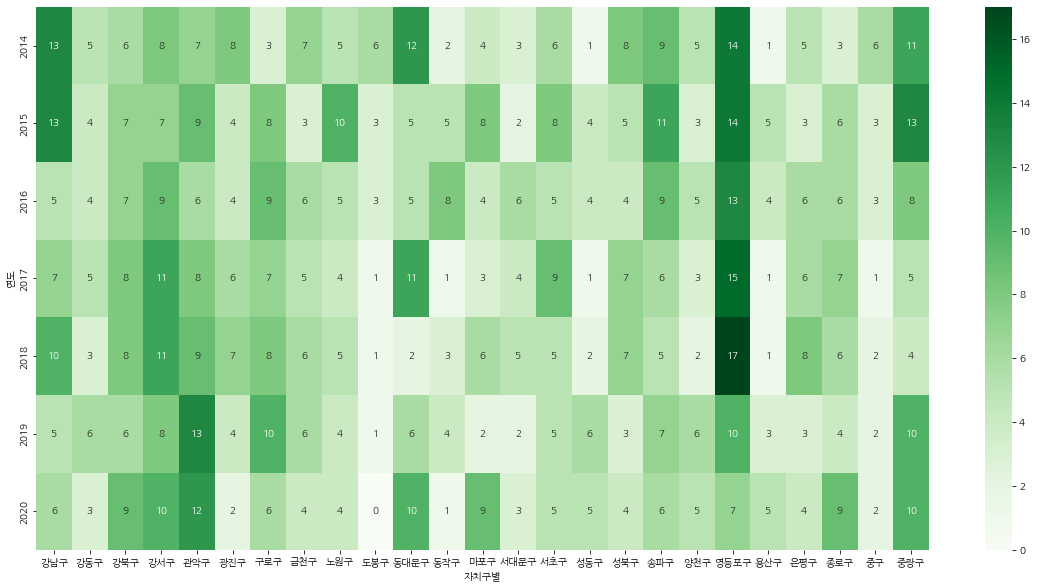

In [106]:
ra_year = df_ra[df_ra["발생/검거"]=="발생"].pivot_table(index="연도", columns="자치구별", values="건수")
plt.figure(figsize=(20, 10))
sns.heatmap(mur_year, annot=True, fmt=",.0f", cmap="Greens")

## 고위험 음주율 데이터 시각화

<AxesSubplot:title={'center':'구별 평균 음주율'}, xlabel='자치구별'>

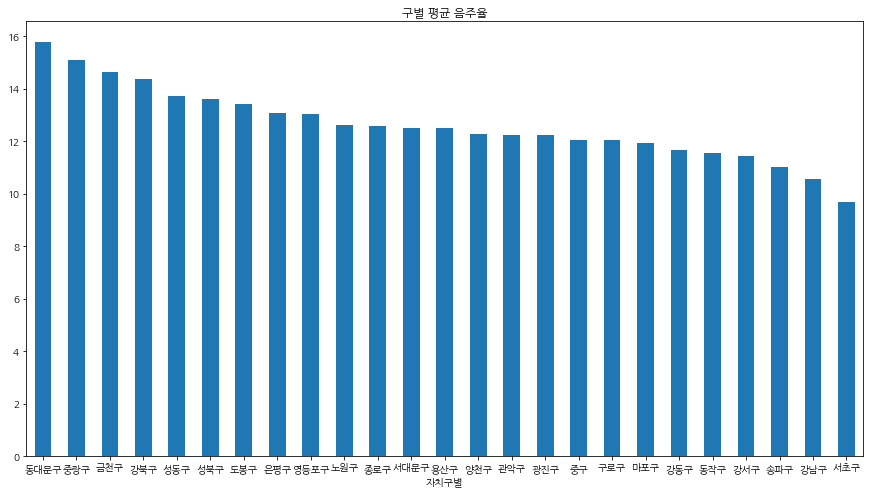

In [107]:
df_drink_m.groupby(by=["자치구별"])["음주율"].mean().sort_values(ascending=False).plot(
    kind="bar", rot=0, title="구별 평균 음주율", figsize=(15, 8) )

In [108]:
drink_year = df_drink_m.pivot_table(index="연도", columns="자치구별", values="음주율")
drink_year

자치구별,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,...,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
연도,,,,,,,,,,,,,,,,,,,,,
2014,9.1,13.1,17.4,11.5,14.3,11.8,15.3,15.6,15.5,13.1,...,14.1,13.2,8.8,11.0,15.6,13.3,16.5,12.9,12.7,16.7
2015,12.3,14.1,12.0,12.3,15.1,13.7,11.4,14.6,15.6,15.8,...,13.2,13.4,14.0,15.6,13.9,14.8,13.2,13.9,14.1,14.7
2016,11.0,11.7,14.4,11.4,10.8,13.8,12.1,16.3,13.6,13.4,...,12.9,13.9,11.9,12.2,11.0,13.5,13.5,14.6,15.2,15.2
2017,9.3,11.7,15.2,12.7,12.1,10.5,13.3,18.8,13.2,14.2,...,14.4,15.3,11.1,15.3,14.9,11.8,14.1,13.8,11.1,16.8
2018,12.3,10.6,14.9,12.9,14.1,13.6,11.1,14.5,10.4,15.3,...,14.6,17.4,9.5,13.1,13.0,11.7,14.0,11.1,13.9,17.2
2019,10.2,13.7,15.6,11.2,10.8,13.4,11.4,13.7,13.3,12.6,...,14.5,11.5,13.6,11.8,12.8,11.1,12.9,15.2,12.1,13.6
2020,9.7,6.7,11.2,8.2,8.5,8.8,9.8,9.0,6.8,9.5,...,12.5,10.5,8.2,7.0,10.0,11.4,7.5,6.7,5.4,11.4


<AxesSubplot:xlabel='연도', ylabel='자치구별'>

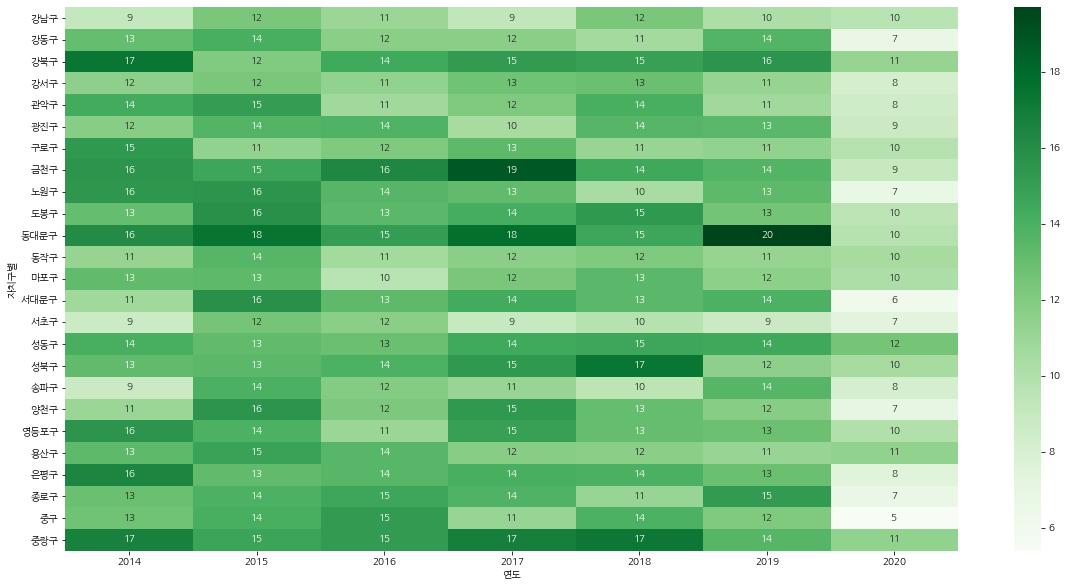

In [247]:
plt.figure(figsize=(20, 10))
sns.heatmap(drink_year.T, annot=True, fmt=",.0f", cmap="Greens")

## CCTV 시각화

<AxesSubplot:title={'center':'구별 평균 CCTV 운영 갯수'}, xlabel='자치구별'>

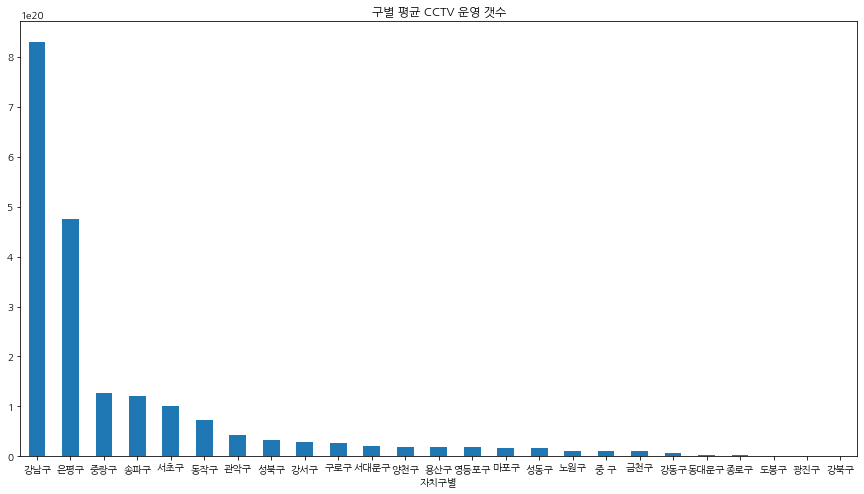

In [110]:
df_cctv_m.groupby(by=["자치구별"])["갯수"].mean().sort_values(ascending=False).plot(
    kind="bar", rot=0, title="구별 평균 CCTV 운영 갯수", figsize=(15, 8))

<AxesSubplot:xlabel='연도', ylabel='자치구별'>

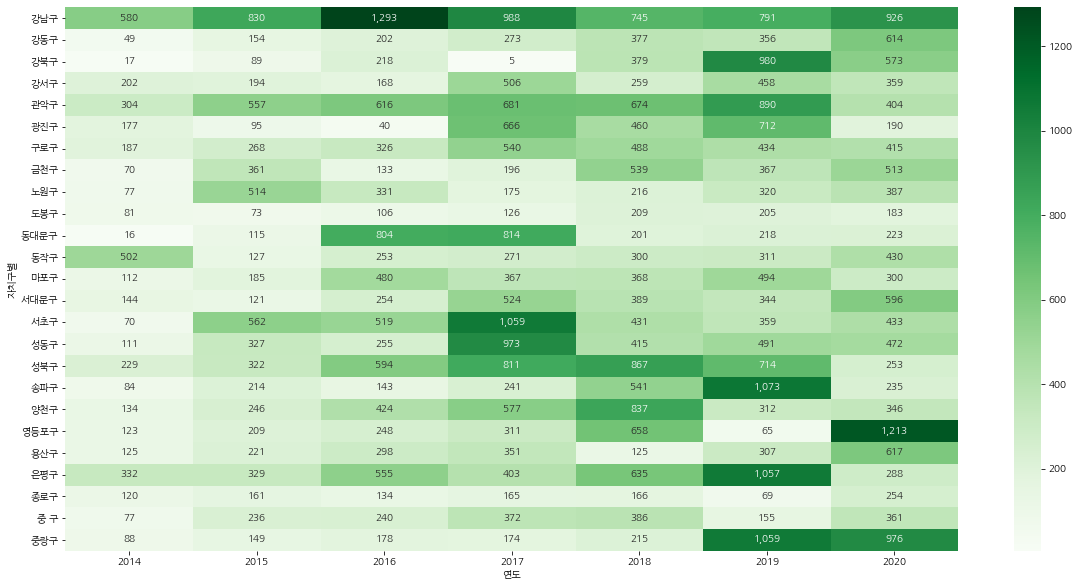

In [246]:
plt.figure(figsize=(20, 10))
sns.heatmap(cctv_year.T, annot=True, fmt=",.0f", cmap="Greens")

# 상관관계 분석

## 폭행/CCTV/유흥주점/음주율 상관 관계 분석

In [114]:
bar_gu = df_bar_gu.reset_index()

In [115]:
hit_mean_df = hit_mean.reset_index()

In [116]:
hit_sol_df = hit_sol.reset_index()
mur_mean_df = mur_mean.reset_index()
mur_sol_df = mur_sol.reset_index()
rob_mean_df = rob_mean.reset_index()
rob_sol_df = rob_sol.reset_index()
steal_mean_df = steal_mean.reset_index()
steal_sol_df = steal_sol.reset_index()

In [117]:
hit_sol_df = hit_sol_df.rename(columns={"건수" : "평균 폭행 검거수"})
mur_mean_df = mur_mean_df.rename(columns={"건수" : "평균 살인 발생수"})
mur_sol_df = mur_sol_df.rename(columns={"건수" : "평균 살인 검거수"})
rob_mean_df = rob_mean_df.rename(columns={"건수" : "평균 강도 발생수"})
rob_sol_df = rob_sol_df.rename(columns={"건수" : "평균 강도 검거수"})
steal_mean_df = steal_mean_df.rename(columns={"건수" : "평균 절도 발생수"})
steal_sol_df = steal_sol_df.rename(columns={"건수" : "평균 절도 검거수"})

In [118]:
bar_gu = bar_gu.rename(columns={"index" : "자치구별", "자치구" : "유흥주점 개수"})
bar_gu.head(2)

,자치구별,지번주소
0,중구,214
1,관악구,190


In [119]:
hit_mean_df = hit_mean_df.rename(columns={"건수" : "평균 폭력 건수"})
hit_mean_df.head(2)

,자치구별,평균 폭력 건수
0,강남구,3979.43
1,강동구,2400.57


In [120]:
cctv_all = cctv_all.rename(columns={"구분" : "자치구별", "총계" : "CCTV 개수"})
cctv_all.head(2)

,자치구별,CCTV 개수
0,종로구,"1,855"
1,중 구,"2,447"


In [121]:
cctv_all.loc[1, "자치구별"] = "중구"

In [122]:
df_join1 = pd.merge(hit_mean_df, bar_gu, how='outer',  on="자치구별")

In [123]:
df_join2 = pd.merge(df_join1, cctv_all, how='outer',  on="자치구별")

In [124]:
df_join2.head()

,자치구별,평균 폭력 건수,지번주소,CCTV 개수
0,강남구,3979.43,178,"6,871"
1,강동구,2400.57,109,"2,874"
2,강북구,2323.71,67,"2,800"
3,강서구,2809.29,126,"2,867"
4,관악구,2996.43,190,"5,342"


In [125]:
df_join3 = df_join2.set_index("자치구별")
df_join3.head()

,평균 폭력 건수,지번주소,CCTV 개수
자치구별,,,
강남구,3979.43,178,"6,871"
강동구,2400.57,109,"2,874"
강북구,2323.71,67,"2,800"
강서구,2809.29,126,"2,867"
관악구,2996.43,190,"5,342"


In [126]:
df_join3["CCTV 개수"] = df_join3["CCTV 개수"].apply(lambda x : int(x.replace(",", "")))

In [127]:
df_join3.head()

,평균 폭력 건수,지번주소,CCTV 개수
자치구별,,,
강남구,3979.43,178,6871
강동구,2400.57,109,2874
강북구,2323.71,67,2800
강서구,2809.29,126,2867
관악구,2996.43,190,5342


In [128]:
drink_mean_df = drink_mean.reset_index()

In [129]:
df_join4 = pd.merge(df_join3, drink_mean_df, how='outer',  on="자치구별")

In [130]:
df_join4.head()

,자치구별,평균 폭력 건수,지번주소,CCTV 개수,음주율
0,강남구,3979.43,178,6871,10.557143
1,강동구,2400.57,109,2874,11.657143
2,강북구,2323.71,67,2800,14.385714
3,강서구,2809.29,126,2867,11.457143
4,관악구,2996.43,190,5342,12.242857


In [131]:
df_join5 = pd.merge(df_join4, hit_sol_df, how='outer',  on="자치구별")

In [132]:
df_join5.head(2)

,자치구별,평균 폭력 건수,지번주소,CCTV 개수,음주율,평균 폭행 검거수
0,강남구,3979.43,178,6871,10.557143,3410.57
1,강동구,2400.57,109,2874,11.657143,1805.14


In [146]:
df_bar_gu = df_bar_gu.reset_index()
df_bar_gu

,index,지번주소
0,중구,214
1,관악구,190
2,종로구,188
3,강남구,178
4,영등포구,130
5,강서구,126
6,강동구,109
7,송파구,88
8,은평구,79
9,강북구,67


In [147]:
df_bar_gu = df_bar_gu.rename(columns = {"index" : "자치구별", "지번주소" : "유흥주점 개수"})
df_bar_gu

,자치구별,유흥주점 개수
0,중구,214
1,관악구,190
2,종로구,188
3,강남구,178
4,영등포구,130
5,강서구,126
6,강동구,109
7,송파구,88
8,은평구,79
9,강북구,67


In [148]:
df_join6 = pd.merge(df_join5, df_bar_gu, how='outer',  on="자치구별")

In [150]:
df_join6.head()

,자치구별,평균 폭력 건수,지번주소,CCTV 개수,음주율,평균 폭행 검거수,유흥주점 개수
0,강남구,3979.43,178,6871,10.557143,3410.57,178
1,강동구,2400.57,109,2874,11.657143,1805.14,109
2,강북구,2323.71,67,2800,14.385714,2105.71,67
3,강서구,2809.29,126,2867,11.457143,2405.57,126
4,관악구,2996.43,190,5342,12.242857,2527.14,190


In [151]:
df_join6 = df_join6[["자치구별", "평균 폭력 건수", "평균 폭행 검거수", "CCTV 개수", "유흥주점 개수", "음주율"]]

In [152]:
df_join6.head()

,자치구별,평균 폭력 건수,평균 폭행 검거수,CCTV 개수,유흥주점 개수,음주율
0,강남구,3979.43,3410.57,6871,178,10.557143
1,강동구,2400.57,1805.14,2874,109,11.657143
2,강북구,2323.71,2105.71,2800,67,14.385714
3,강서구,2809.29,2405.57,2867,126,11.457143
4,관악구,2996.43,2527.14,5342,190,12.242857


In [153]:
df_corr = df_join6.corr()

<AxesSubplot:>

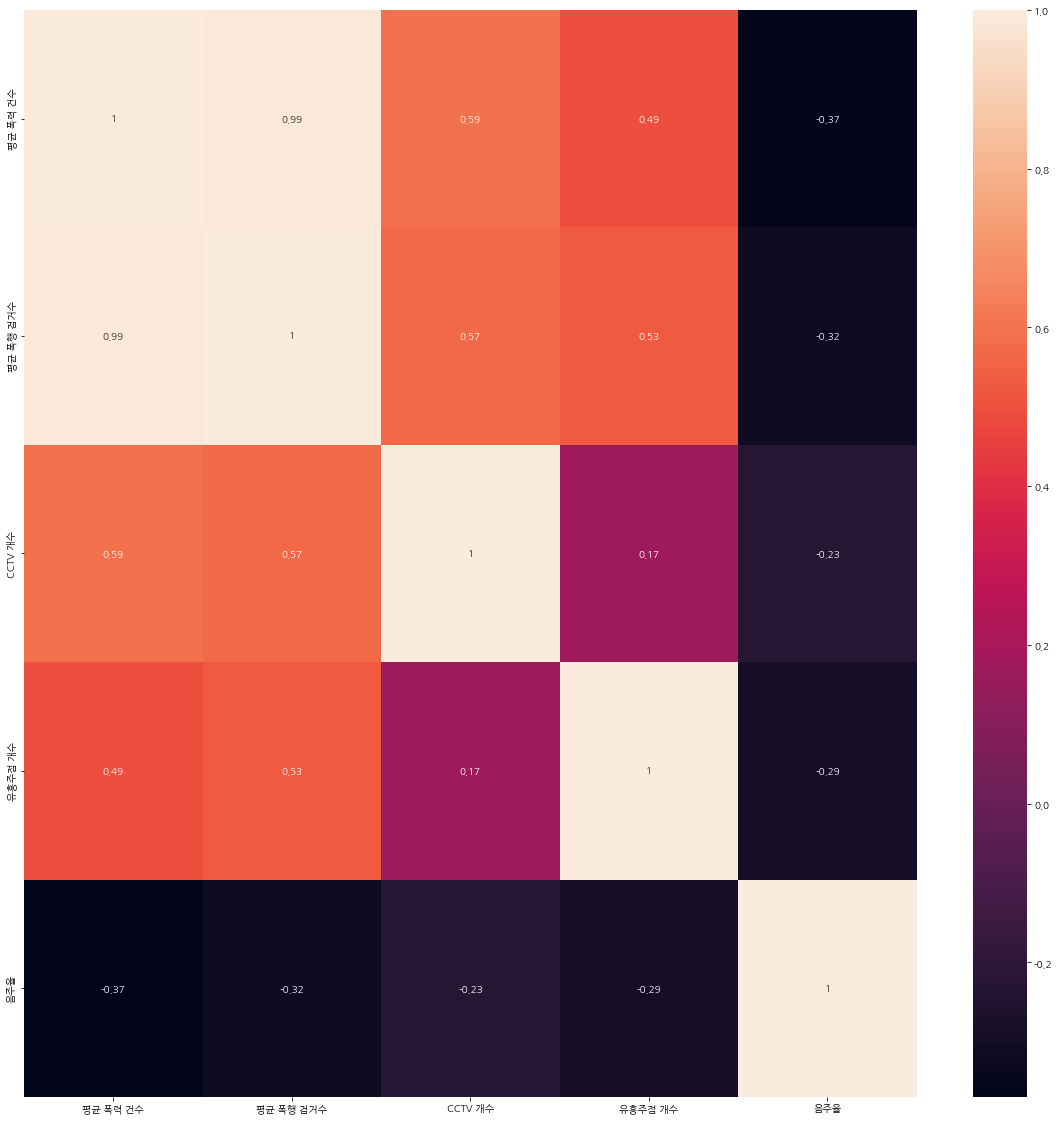

In [154]:
plt.figure(figsize=(20, 20))
sns.heatmap(df_join6.corr(), annot=True)

In [155]:
mask = np.triu(np.ones_like(df_corr))

<AxesSubplot:>

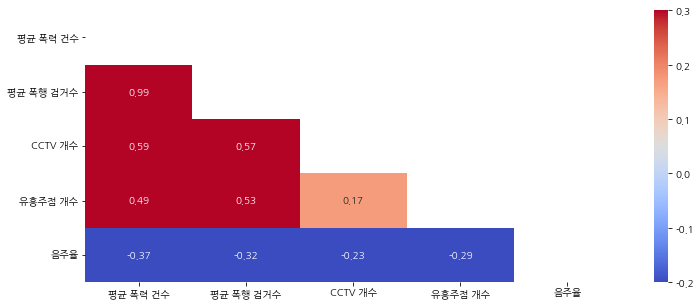

In [156]:
plt.figure(figsize=(12,5))
sns.heatmap(df_corr, annot=True, fmt=".2f", cmap="coolwarm", vmin=-0.2, vmax=0.3, mask=mask)

## 폭행 / CCTV 데이터 전처리 및 상관관계 분석

폭행 발생 이후 CCTV가 증가했을 거라는 가설 검증을 위한\
폭행 연도 x 와 CCTV 연도 X+1 을 비교하기 위한 전처리

In [157]:
cctv_year_t = cctv_year.T

In [158]:
cctv_year_t = cctv_year_t.rename(index={"중 구" : "중구"})

In [159]:
cctv_2015 = cctv_year_t[2015].reset_index()

In [160]:
cctv_2015 = cctv_2015.rename(columns={2015 : "2015 CCTV"})

In [161]:
cctv_2016 = cctv_year_t[2016].reset_index()
cctv_2016 = cctv_2016.rename(columns={2016 : "2016 CCTV"})

In [162]:
cctv_2017 = cctv_year_t[2017].reset_index()
cctv_2017 = cctv_2017.rename(columns={2017 : "2017 CCTV"})

In [163]:
cctv_2018 = cctv_year_t[2018].reset_index()
cctv_2018 = cctv_2018.rename(columns={2018 : "2018 CCTV"})

In [164]:
cctv_2019 = cctv_year_t[2019].reset_index()
cctv_2019 = cctv_2019.rename(columns={2019 : "2019 CCTV"})

In [165]:
cctv_2020 = cctv_year_t[2020].reset_index()
cctv_2020 = cctv_2020.rename(columns={2020 : "2020 CCTV"})

In [166]:
hit_year_t = hit_year.T

In [167]:
hit_2014 = hit_year_t[2014].reset_index()

In [168]:
hit_2014 = hit_2014.rename(columns={2014 : "2014 폭행 발생"})

In [169]:
hit_2015 = hit_year_t[2015].reset_index()
hit_2015 = hit_2015.rename(columns={2015 : "2015 폭행 발생"})

In [170]:
hit_2016 = hit_year_t[2016].reset_index()
hit_2016 = hit_2016.rename(columns={2016 : "2016 폭행 발생"})

In [171]:
hit_2017 = hit_year_t[2017].reset_index()
hit_2017 = hit_2017.rename(columns={2017 : "2017 폭행 발생"})

In [172]:
hit_2018 = hit_year_t[2018].reset_index()
hit_2018 = hit_2018.rename(columns={2018 : "2018 폭행 발생"})

In [173]:
hit_2019 = hit_year_t[2019].reset_index()
hit_2019 = hit_2019.rename(columns={2019 : "2019 폭행 발생"})

In [174]:
df_join11 = pd.merge(hit_2014, cctv_2015, how='outer',  on="자치구별")

In [175]:
df_join11 = pd.merge(df_join11, hit_2015, how='outer',  on="자치구별")

In [176]:
df_join11 = pd.merge(df_join11, cctv_2016, how='outer',  on="자치구별")

In [177]:
df_join11 = pd.merge(df_join11, cctv_2017, how='outer',  on="자치구별")

In [178]:
df_join11 = pd.merge(df_join11, hit_2017, how='outer',  on="자치구별")

In [179]:
df_join11 = pd.merge(df_join11, cctv_2018, how='outer',  on="자치구별")

In [180]:
df_join11 = pd.merge(df_join11, hit_2018, how='outer',  on="자치구별")

In [181]:
df_join11 = pd.merge(df_join11, cctv_2019, how='outer',  on="자치구별")

In [182]:
df_join11 = pd.merge(df_join11, hit_2019, how='outer',  on="자치구별")

In [183]:
df_join11 = pd.merge(df_join11, cctv_2020, how='outer',  on="자치구별")

In [184]:
df_join11 = pd.merge(df_join11, hit_2016, how='outer',  on="자치구별")

In [185]:
df_join11.columns

Index(['자치구별', '2014 폭행 발생', '2015 CCTV', '2015 폭행 발생', '2016 CCTV',
       '2017 CCTV', '2017 폭행 발생', '2018 CCTV', '2018 폭행 발생', '2019 CCTV',
       '2019 폭행 발생', '2020 CCTV', '2016 폭행 발생'],
      dtype='object')

In [186]:
df_join11 = df_join11[['자치구별', '2014 폭행 발생', '2015 폭행 발생', '2016 폭행 발생',
       '2017 폭행 발생',  '2018 폭행 발생', '2019 폭행 발생', '2015 CCTV', '2016 CCTV',  '2017 CCTV','2018 CCTV','2019 CCTV','2020 CCTV']]

In [187]:
df_corr11 = df_join11.corr()

In [192]:
df_join11.head()

,자치구별,2014 폭행 발생,2015 폭행 발생,2016 폭행 발생,2017 폭행 발생,2018 폭행 발생,2019 폭행 발생,2015 CCTV,2016 CCTV,2017 CCTV,2018 CCTV,2019 CCTV,2020 CCTV
0,강남구,4394,4284,4002,3956,3885,3658,830.0,1293.0,988.0,745.0,791.0,926.0
1,강동구,2804,2712,2530,2429,2224,2163,154.0,202.0,273.0,377.0,356.0,614.0
2,강북구,2320,2649,2778,2156,2122,2424,89.0,218.0,5.0,379.0,980.0,573.0
3,강서구,2717,3207,3204,2916,2619,2557,194.0,168.0,506.0,259.0,458.0,359.0
4,관악구,3359,3298,3235,3152,2643,2674,557.0,616.0,681.0,674.0,890.0,404.0


In [189]:
mask = np.triu(np.ones_like(df_corr11))

<AxesSubplot:>

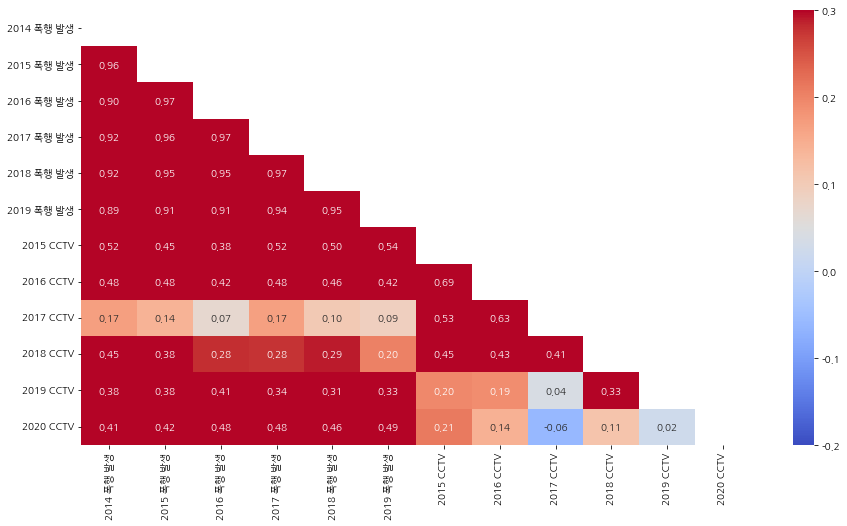

In [190]:
plt.figure(figsize=(15,8))
sns.heatmap(df_corr11, annot=True, fmt=".2f", cmap="coolwarm", vmin=-0.2, vmax=0.3, mask=mask)

In [196]:
hit_2014["2014 폭행 발생"].sum()

65318

In [198]:
hit_2014["구별 발생 비율"] = hit_2014["2014 폭행 발생"].apply(lambda x : x/65318 * 100)

In [202]:
hit_2014

,자치구별,2014 폭행 발생,구별 발생 비율
0,강남구,4394,6.727089
1,강동구,2804,4.292844
2,강북구,2320,3.551854
3,강서구,2717,4.159650
4,관악구,3359,5.142533
5,광진구,2828,4.329588
6,구로구,2743,4.199455
7,금천구,2112,3.233412
8,노원구,2722,4.167305
9,도봉구,1585,2.426590


In [201]:
hit_2014["구별 발생 비율"].sum()

100.0

,자치구별,2015 폭행 발생
0,강남구,4284
1,강동구,2712
2,강북구,2649
3,강서구,3207
4,관악구,3298
5,광진구,2625
6,구로구,3007
7,금천구,2054
8,노원구,2723
9,도봉구,1487


# 범죄 시간 데이터 분석

In [205]:
glob("data\*.csv")

['data\\5대범죄+발생장소별+현황_20221019093633.csv',
 'data\\5대범죄발생현황_20221019092810.csv',
 'data\\고위험+음주율_20221019142156.csv',
 'data\\도로+현황(폭원별)(1987년+이후)_20221020164851.csv',
 'data\\도로시설물_가로등개수_20221020164902.csv',
 'data\\범죄발생_시간_20221020174709.csv',
 'data\\서울시 유흥주점영업 인허가 정보.csv',
 'data\\서울시CCTV설치운영현황(자치구)_연도별_220630기준.csv',
 'data\\서울특별시_도봉구_보안등정보_20180515.csv']

In [208]:
crime_time = pd.read_csv('data\\범죄발생_시간_20221020174709.csv', encoding="cp949")

In [211]:
crime_time.shape

(40, 9)

In [213]:
crime_time.head()

,범죄별(1),시간별(1),2014,2015,2016,2017,2018,2019,2020
0,절도,00:00-02:59,21567,19607,15523,13751,12596,13095,11789
1,절도,03:00-05:59,21195,19561,15832,14385,13731,14176,13672
2,절도,06:00-08:59,17918,16584,13882,12502,12483,13104,12392
3,절도,09:00-11:59,29081,26347,22982,21531,20672,21763,21358
4,절도,12:00-14:59,30903,29451,26400,24623,24578,27242,26743


In [210]:
crime_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   범죄별(1)  40 non-null     object
 1   시간별(1)  40 non-null     object
 2   2014    40 non-null     int64 
 3   2015    40 non-null     int64 
 4   2016    40 non-null     int64 
 5   2017    40 non-null     int64 
 6   2018    40 non-null     int64 
 7   2019    40 non-null     int64 
 8   2020    40 non-null     int64 
dtypes: int64(7), object(2)
memory usage: 2.9+ KB


In [216]:
crime_time = crime_time.rename(columns = {"범죄별(1)" : "범죄", "시간별(1)" : "시간대"})

In [217]:
crime_time.head()

,범죄,시간대,2014,2015,2016,2017,2018,2019,2020
0,절도,00:00-02:59,21567,19607,15523,13751,12596,13095,11789
1,절도,03:00-05:59,21195,19561,15832,14385,13731,14176,13672
2,절도,06:00-08:59,17918,16584,13882,12502,12483,13104,12392
3,절도,09:00-11:59,29081,26347,22982,21531,20672,21763,21358
4,절도,12:00-14:59,30903,29451,26400,24623,24578,27242,26743


In [234]:
crime_time["범죄"].value_counts()

절도     8
살인     8
강도     8
성폭력    8
폭행     8
Name: 범죄, dtype: int64

In [223]:
crime_hit_time = crime_time[crime_time["범죄"] == "폭행"]
crime_hit_time = crime_hit_time.set_index("시간대")
crime_hit_time = crime_hit_time.drop(columns = "범죄")

In [226]:
crime_hit_time.head()

,2014,2015,2016,2017,2018,2019,2020
시간대,,,,,,,
00:00-02:59,20789,22467,23719,22343,20672,19898,16548
03:00-05:59,16233,18015,19177,18552,17595,17036,14030
06:00-08:59,7791,8883,9995,9738,9728,9618,8244
09:00-11:59,9147,10576,11605,11575,12137,11964,10865
12:00-14:59,9464,10695,11862,11798,12310,12867,11842


<AxesSubplot:ylabel='시간대'>

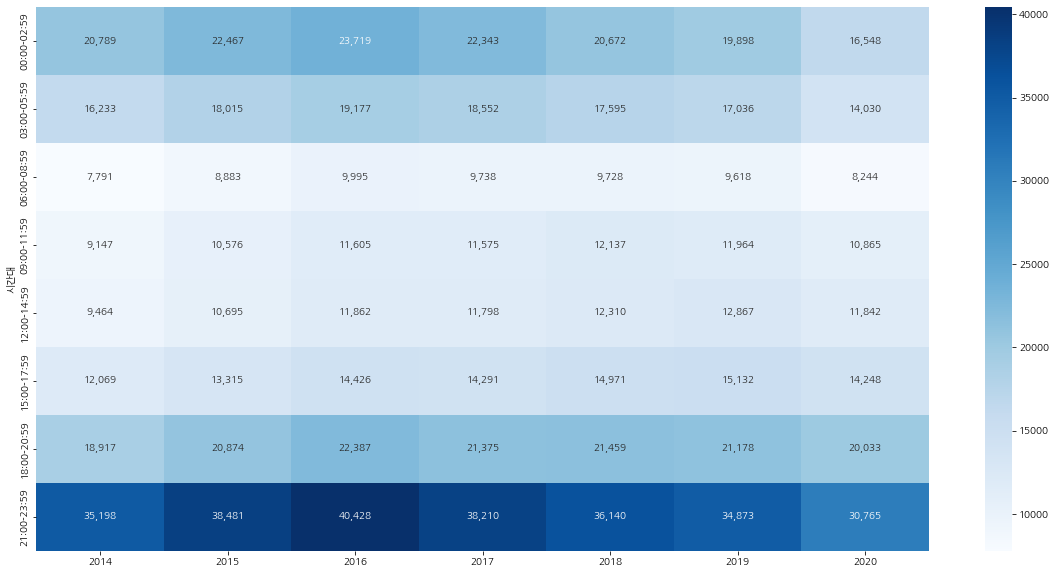

In [230]:
plt.figure(figsize=(20, 10))
sns.heatmap(crime_hit_time, annot=True, fmt=",.0f", cmap="Blues")

In [225]:
crime_st_time = crime_time[crime_time["범죄"] == "절도"]
crime_st_time = crime_st_time.set_index("시간대")
crime_st_time = crime_st_time.drop(columns = "범죄")
crime_st_time.head()

,2014,2015,2016,2017,2018,2019,2020
시간대,,,,,,,
00:00-02:59,21567,19607,15523,13751,12596,13095,11789
03:00-05:59,21195,19561,15832,14385,13731,14176,13672
06:00-08:59,17918,16584,13882,12502,12483,13104,12392
09:00-11:59,29081,26347,22982,21531,20672,21763,21358
12:00-14:59,30903,29451,26400,24623,24578,27242,26743


<AxesSubplot:ylabel='시간대'>

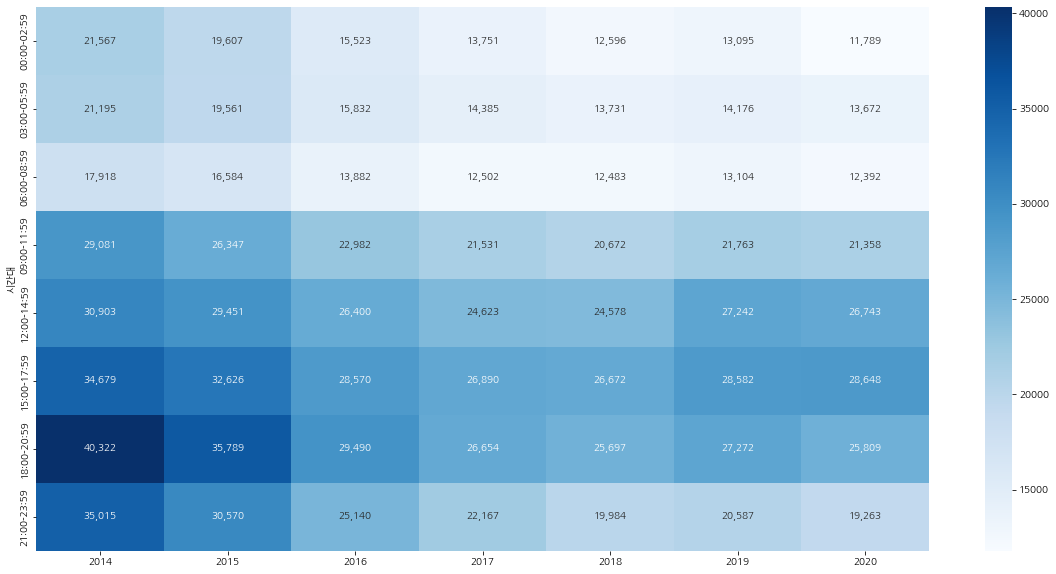

In [231]:
plt.figure(figsize=(20, 10))
sns.heatmap(crime_st_time, annot=True, fmt=",.0f", cmap="Blues")

In [232]:
crime_mur_time = crime_time[crime_time["범죄"] == "살인"]
crime_mur_time = crime_mur_time.set_index("시간대")
crime_mur_time = crime_mur_time.drop(columns = "범죄")
crime_mur_time.head()

,2014,2015,2016,2017,2018,2019,2020
시간대,,,,,,,
00:00-02:59,82,74,77,67,65,49,56
03:00-05:59,86,85,70,69,57,73,58
06:00-08:59,65,73,75,75,63,49,63
09:00-11:59,94,108,98,94,91,86,78
12:00-14:59,91,84,102,88,78,97,78


<AxesSubplot:ylabel='시간대'>

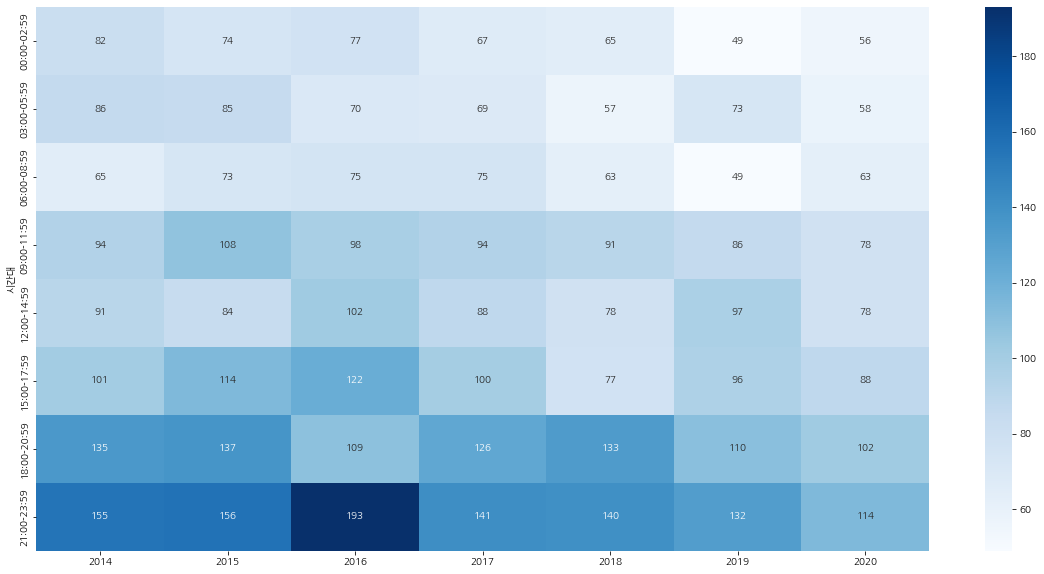

In [233]:
plt.figure(figsize=(20, 10))
sns.heatmap(crime_mur_time, annot=True, fmt=",.0f", cmap="Blues")

In [235]:
crime_rob_time = crime_time[crime_time["범죄"] == "강도"]
crime_rob_time = crime_rob_time.set_index("시간대")
crime_rob_time = crime_rob_time.drop(columns = "범죄")
crime_rob_time.head()

,2014,2015,2016,2017,2018,2019,2020
시간대,,,,,,,
00:00-02:59,249,232,150,132,112,112,80
03:00-05:59,297,262,200,162,135,133,96
06:00-08:59,86,79,78,58,49,45,35
09:00-11:59,92,110,77,72,76,66,64
12:00-14:59,120,102,107,77,68,75,67


<AxesSubplot:ylabel='시간대'>

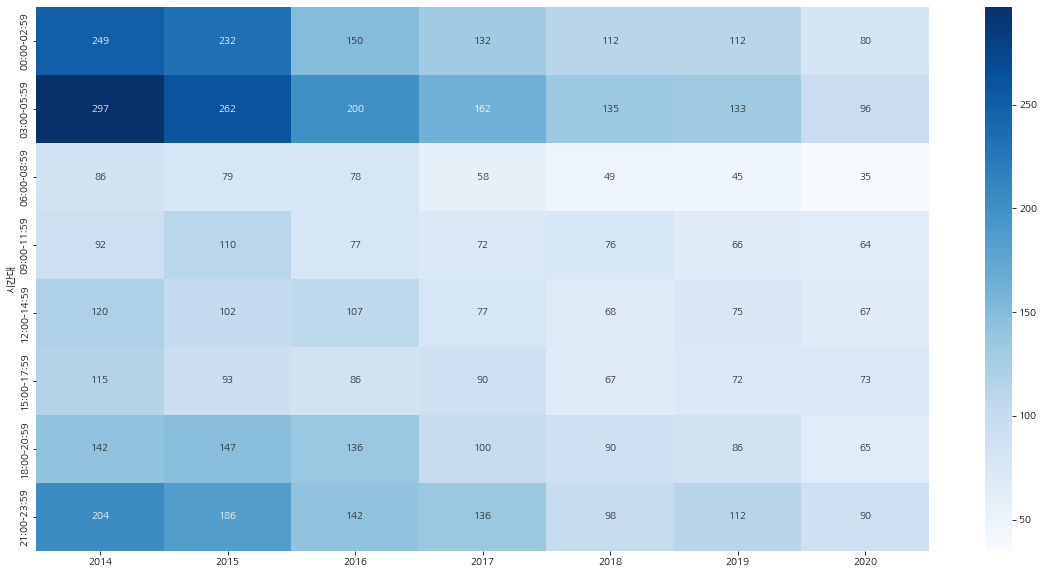

In [236]:
plt.figure(figsize=(20, 10))
sns.heatmap(crime_rob_time, annot=True, fmt=",.0f", cmap="Blues")

In [238]:
crime_ra_time = crime_time[crime_time["범죄"] == "성폭력"]
crime_ra_time = crime_ra_time.set_index("시간대")
crime_ra_time = crime_ra_time.drop(columns = "범죄")
crime_ra_time.head()

,2014,2015,2016,2017,2018,2019,2020
시간대,,,,,,,
00:00-02:59,2511,2518,2897,3200,3054,3061,2820
03:00-05:59,2651,2665,2852,3296,3250,3332,2808
06:00-08:59,2275,2465,2202,2615,2246,2233,1726
09:00-11:59,2197,2122,1996,2559,2394,2317,2207
12:00-14:59,2330,2473,2241,2651,2615,2539,2479


<AxesSubplot:ylabel='시간대'>

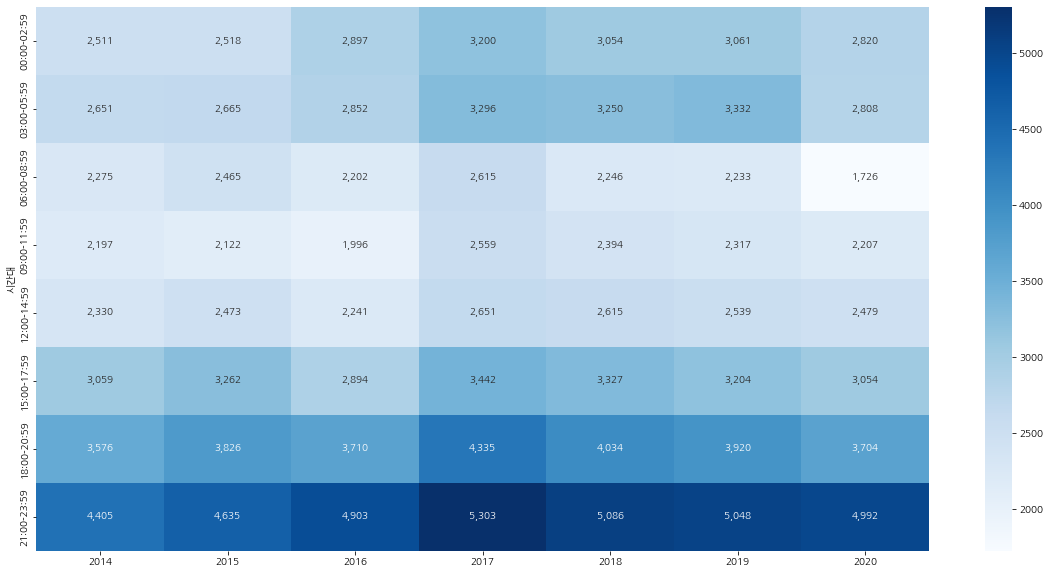

In [239]:
plt.figure(figsize=(20, 10))
sns.heatmap(crime_ra_time, annot=True, fmt=",.0f", cmap="Blues")

# 면적 대비 가로등 추가 상관계수 분석

In [291]:
df_lamp.loc[174, "건수"] = 7952

In [292]:
df_lamp

,자치구,년도,건수
0,종로구,2014,8988
1,중구,2014,9200
2,용산구,2014,6886
3,성동구,2014,5532
4,광진구,2014,4982
...,...,...,...
170,관악구,2020,5588
171,서초구,2020,12588
172,강남구,2020,14326
173,송파구,2020,14184


In [250]:
df_lamp = df_lamp.drop("자치구별(1)",axis =1)

In [251]:
df_lamp = df_lamp.drop([0,1])

In [252]:
df_lamp= df_lamp.rename(columns= {"자치구별(2)":"자치구"})

In [254]:
df_lamp = df_lamp.melt(id_vars = "자치구", value_vars = df_lamp.columns[1:], value_name = "건수", var_name ="년도")

In [293]:
lamp_2020 = df_lamp[df_lamp["년도"] == "2020"]
lamp_2020

,자치구,년도,건수
150,종로구,2020,8818
151,중구,2020,8550
152,용산구,2020,7838
153,성동구,2020,6266
154,광진구,2020,4908
155,동대문구,2020,8342
156,중랑구,2020,6521
157,성북구,2020,5744
158,강북구,2020,4301
159,도봉구,2020,4584


In [294]:
area_df = pd.read_csv("data\서울시 구별 면적.csv", encoding = "cp949")
area_df

,시도(1),시군구(1),2020
0,시도(1),시군구(1),계
1,시도(1),시군구(1),면적
2,서울,종로구,23913168.3
3,서울,중구,9960304.5
4,서울,용산구,21866144.1
5,서울,성동구,16861003.9
6,서울,광진구,17062938.6
7,서울,동대문구,14215623.5
8,서울,중랑구,18496082.3
9,서울,성북구,24576832.9


In [295]:
area_df = area_df.drop([0,1])
area_df

,시도(1),시군구(1),2020
2,서울,종로구,23913168.3
3,서울,중구,9960304.5
4,서울,용산구,21866144.1
5,서울,성동구,16861003.9
6,서울,광진구,17062938.6
7,서울,동대문구,14215623.5
8,서울,중랑구,18496082.3
9,서울,성북구,24576832.9
10,서울,강북구,23600354.9
11,서울,도봉구,20651081.9


In [296]:
area_df = area_df.drop(columns = {"시도(1)", "시군구(1)"})

In [297]:
area_df = area_df.rename(columns = {"2020": "면적"})
area_df.head()

,면적
2,23913168.3
3,9960304.5
4,21866144.1
5,16861003.9
6,17062938.6


In [298]:
lamp_2020 = lamp_2020.reset_index(drop = True)
area_df = area_df.reset_index(drop = True)

In [305]:
concat_df = pd.concat([lamp_2020, area_df], axis = 1)
concat_df.head()

,자치구,년도,건수,면적
0,종로구,2020,8818,23913168.3
1,중구,2020,8550,9960304.5
2,용산구,2020,7838,21866144.1
3,성동구,2020,6266,16861003.9
4,광진구,2020,4908,17062938.6


In [306]:
concat_df["면적"] = concat_df["면적"].astype(float)
concat_df[["면적"]] = concat_df[["면적"]] / 1000000 

In [307]:
concat_df[["면적"]] = concat_df[["면적"]].round(2)
concat_df[["면적"]] 

,면적
0,23.91
1,9.96
2,21.87
3,16.86
4,17.06
5,14.22
6,18.50
7,24.58
8,23.60
9,20.65


In [308]:
concat_df = concat_df.rename(columns = {"면적": "면적:km"})
concat_df

,자치구,년도,건수,면적:km
0,종로구,2020,8818,23.91
1,중구,2020,8550,9.96
2,용산구,2020,7838,21.87
3,성동구,2020,6266,16.86
4,광진구,2020,4908,17.06
5,동대문구,2020,8342,14.22
6,중랑구,2020,6521,18.50
7,성북구,2020,5744,24.58
8,강북구,2020,4301,23.60
9,도봉구,2020,4584,20.65


In [309]:
concat_df["건수"] = concat_df["건수"].astype(int)
concat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   자치구     25 non-null     object 
 1   년도      25 non-null     object 
 2   건수      25 non-null     int32  
 3   면적:km   25 non-null     float64
dtypes: float64(1), int32(1), object(2)
memory usage: 828.0+ bytes


In [310]:
concat_df["비교"] = concat_df["건수"] / concat_df["면적:km"]

In [311]:
concat_df[["비교"]] = concat_df[["비교"]].round(0).astype(int)

In [312]:
sort_df = concat_df.sort_values("비교",ascending = False)
sort_df

,자치구,년도,건수,면적:km,비교
1,중구,2020,8550,9.96,858
5,동대문구,2020,8342,14.22,587
14,양천구,2020,8583,17.41,493
17,금천구,2020,5507,13.02,423
23,송파구,2020,14184,33.87,419
16,구로구,2020,8199,20.12,408
18,영등포구,2020,9535,24.55,388
19,동작구,2020,6105,16.35,373
3,성동구,2020,6266,16.86,372
0,종로구,2020,8818,23.91,369


In [315]:
lamp2_2020 = sort_df[["자치구", "비교"]]

<AxesSubplot:xlabel='자치구', ylabel='비교'>

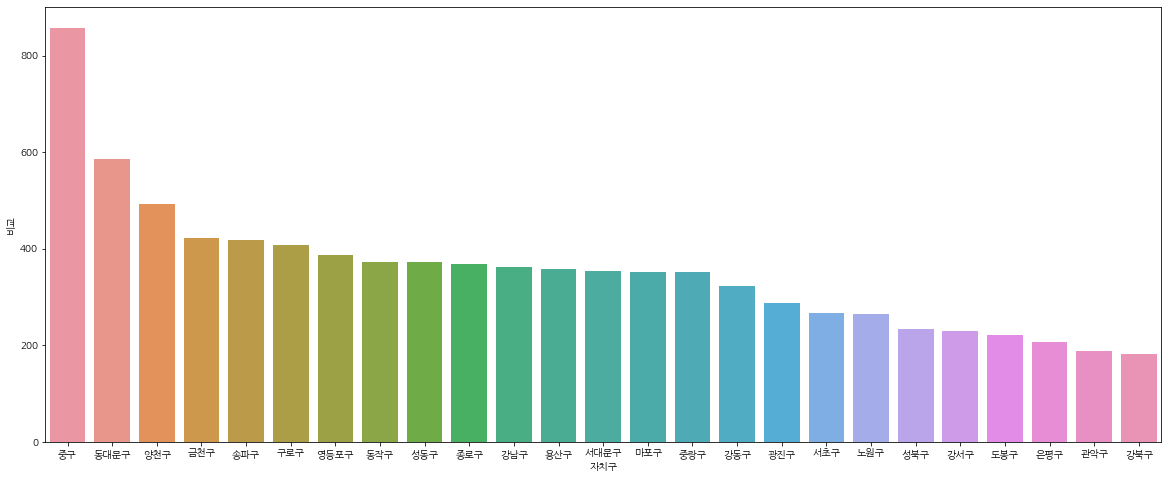

In [314]:
plt.figure(figsize=(20, 8))
sns.barplot(data = sort_df, x = "자치구", y = "비교")

In [319]:
lamp2_2020 = lamp2_2020.rename(columns = {"자치구" : "자치구별"})

In [320]:
df_join7 = pd.merge(df_join6, lamp2_2020, how='outer',  on="자치구별")

In [322]:
df_join7 = df_join7.rename(columns = {"비교" : "면적 대비 가로등"})

In [323]:
df_corr7 = df_join7.corr()

In [324]:
mask = np.triu(np.ones_like(df_corr7))

<AxesSubplot:>

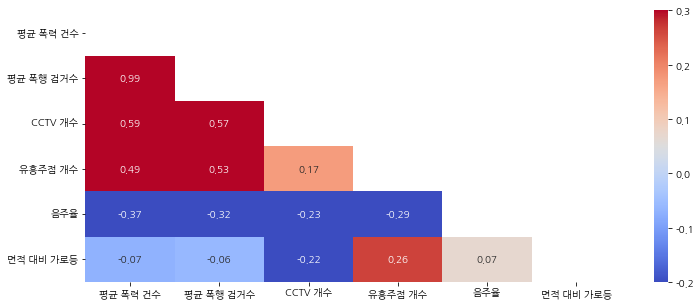

In [325]:
plt.figure(figsize=(12,5))
sns.heatmap(df_corr7, annot=True, fmt=".2f", cmap="coolwarm", vmin=-0.2, vmax=0.3, mask=mask)